## REPETIT.ru

## Описание задачи

**Заказчик** — площадка по подбору репетиторов `Repetit.ru`. Сервис передает контакты клиента (ученика), но не всегда получает деньги. Иногда, это из-за того, что репетитор звонит по телефону и ему просто не отвечают. Некоторые репетиторы плохо договариваются о занятиях или обманывают. Сервис теряет деньги каждый раз, когда отдаёт заявку такому репетитору. Заказчику нужно как можно раньше понять, что репетитор недобросовестный или мошенник, чтобы отключить его от сервиса и отдавать заявки ответственным репетиторам.

**Цель:** Разработать модель, которая по имеющейся информации о репетиторе и проведенных им занятий будет классифицировать репетиторов на платящих и избегающих оплаты (обманывающих).

**Метрика:** Оценка качества модели будет производиться с использованием метрики F1.

**Описание данных:**

Информация о репетиторах (teacher_info.feather)

- id - айди репетитора 
- reg_date - дата регистрации
- birth_date - дата рождения
- teaching_start_date - дата начала первого занятия
- is_email_confirmed - подтвержден ли e-mail адресс
- lesson_duration - продолжит урока
- lesson_cost - стоимость урока
- is_display - показывается в каталоге
- last_visited - послеждний визит
- is_pupils_needed - открыт для заявок
- is_cell_phone_confirmed - подтвержден ли номер телефона
- area_id - регион 
- sex - пол 
- orders_allowed - разрешено назначать на заявки
- review_num - отзывы

Статистика по репетиторам и таргет (teachers.feather)

- id - айди репетитора 
- lessons_delivered - поставлено уроков
- mean_lesson_price - средняя стоимость уроков
- lessons_given - оплачено уроков
- lessons_started_fraction - процент начала занятий
- lessons_per_pupil - занятий на ученика
- money_recieved - получено денег
- blocked - целевой признак (active/blocked)

Ученики (lesson_course.feather)
- Id - айди
- client_id - айди ученика
- teacher_id - айди репетитора
- order_id - айди заявки
- lesson_place - занятия онлайн или офлайн
- lesson_price - цена
- is_active - идут ли занятия, на паузе, завершены
- lesson_duration - продолжительность урока
- date_updated
- suspend_till_date

Занятия (lessons.feather)
- Id - айди
- lesson_course_id - айди ученика
- lesson_date - дата
- time_from - время от 
- time_to - время до
- home_task - дз
- is_regular - автоматически повторяющееся занятие
- amount_to_pay - стоимость
- amount_paid - оплачено

Цены на занятия репетиторов (teacher_prices.feather)
- date_update - дата обновления цен
- teacher_id - айди репетитора
- subject_id - айди предмета
- price - цена занятий у себя
- price_external - цена занятий на выезде
- price_remote - цена онлайн занятий

Заявки (orders.feather)
- order_date - дата создания 
- subject_id - предмет
- purpose - цель занятий
- lesson_price - цена
- lesson_duration - желаемая проодолжительность урока
- home_metro_id - ближайшее метро
- add_info - доп инфо
- start_date
- working_teacher_id
- status_id - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)
- comments   
- amount_to_pay
- planned_lesson_number - клиент планирует N занятий
- first_lesson_date - дата 1 занятия
- creator_id - кто создал заявку (id сотрудника или клиента)
- pupil_category_new_id - возраст ученика
- lessons_per_week - занятий а неделю
- minimal_price
- teacher_sex - пол репетитора
- teacher_experience_from - опыт репетитора от
- teacher_experience_to- опыт репетитора до
- lesson_place_new - онлайн, у ученика, у учителя
- pupil_knowledgelvl -уровень знаний ученика
- teacher_age_from - желаемый возраст репеитора от
- teacher_age_to - желаемый возраст репеитора от
- chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно
- no_teachers_available - на заявку нет подходящих репов
- source_id - где создана заявка (какая часть сайта, не регион)
- original_order_id - дублем какой заявки является эта заявка
- client_id - айди клиента
- additional_status_id
- max_metro_distance - максимально готов ехать от метро
- estimated_fee 
- payment_date
- test_group - аб тесты
- is_display_to_teachers - хочет ли клиент получать отклики репетиторов


## План реализации:
1. Загрузка и ознакомление с данными,
2. Предварительная обработка и отбор полезных признаков,
3. Полноценный разведочный анализ,
4. Разработка новых синтетических признаков,
5. Отбор финального набора обучающих признаков.
6. Выбор и обучение моделей,
7. Итоговая оценка качества предсказания лучшей модели,
8. Анализ важности ее признаков.
9. Подготовка отчета по исследованию

**❓Рекомендуемые инструменты для реализации задачи:** 

Python, Pandas, Numpy, Matplotlib, Scikit-learn, LightGBM, CatBoost


## Признаки обмана, выявленные при ручной проверке

Заказчик произвел ручную проверку репетиторов на предмет мошенничества (звонки клиентам и так далее). Выяснилось, что 20% обманывают нас так или иначе: 
1. Несоответствие цены в заявке, в анкете репетитора и реальной
2. 1 занятие на ученика (соотношение к общему кол-ву занятий)
3. Разная стоимость с разными учениками
4. Разная стоимость уроков с одним учеником
5. Стоят занятия в расписании, а оплат нет
6. Когда у репетитора по разным ученикам оплаты рядом по времени, то он сам оплачивает
7. Как часто заходит в приложение - если редко, то сам оплачивает
8. Статус заявки договорились о занятиях, оплат нет более недели (и не перенесено)
      - status в orders = 9
      - lessons с amount_payed > 0 за последнюю неделю
9. Ученик не отмечен как завершенный, а оплат нет
10. Репетитор отчитался, что провёл платное занятие, оплаты нет
11. Цена ниже 500 р. в регионах, ниже 700 в мск

# Импорт библиотек и датафреймов 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import missingno as msno
import phik


from sklearn.model_selection import (
    GridSearchCV, 
    cross_val_score,
    train_test_split
)

from sklearn.impute import SimpleImputer
from sklearn.metrics import(
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import (GradientBoostingClassifier, 
                              AdaBoostClassifier, 
                              RandomForestClassifier
                             )
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier

In [3]:
# Параметры отображения
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [4]:
path_to_dir = 'data/'

In [5]:
# Загрузка и чтение данных из файлов формата Feather
try:
    lesson_course = pd.read_feather('lesson_course.feather')
    lessons = pd.read_feather('lessons.feather')
    orders = pd.read_feather('orders.feather')
    teacher_prices = pd.read_feather('teacher_prices.feather')
    teachers_info = pd.read_feather('teachers_info.feather')
    teachers = pd.read_feather('teachers.feather')
except: 
    lesson_course = pd.read_feather(path_to_dir + 'lesson_course.feather')
    lessons = pd.read_feather(path_to_dir + 'lessons.feather')
    orders = pd.read_feather(path_to_dir + 'orders.feather')
    teacher_prices = pd.read_feather(path_to_dir + 'teacher_prices.feather')
    teachers_info = pd.read_feather(path_to_dir + 'teachers_info.feather')
    teachers = pd.read_feather(path_to_dir + 'teachers.feather')

# Обзор данных

In [6]:
# Функция для обзора данных
def data_review(data):

    print('\033[1m \nОбщая информация: \n\033[0m \n')
    data.info()
    display(data.head(2))
    #display(data.tail(2))

    print('\n\033[1m Пропуски в данных: \033[0m \n')
    display(data.isna().sum())
    print('\n\033[1m Всего пропущенных значений: \033[0m', data.isna().sum().sum())
    print('\n\033[1m Количество явных дублей: \033[0m', data.duplicated().sum())
    
    print('\n\033[1m Основные статистические характеристики данных: \033[0m')
    display(data.describe())

### Ученики

In [7]:
# Применение функции к каждому набору данных
data_review(lesson_course)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893438 entries, 0 to 893437
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 893438 non-null  int64  
 1   client_id          893437 non-null  float64
 2   teacher_id         893438 non-null  int64  
 3   order_id           890132 non-null  float64
 4   lesson_place       893438 non-null  int64  
 5   lesson_price       893438 non-null  int64  
 6   is_active          893438 non-null  int64  
 7   lesson_duration    893438 non-null  int64  
 8   date_updated       893438 non-null  object 
 9   suspend_till_date  893438 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 68.2+ MB


,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
0,240884,427831.00,133738,718009.00,2,1000,1,60,2021-04-25 23:08:17.883,2018-08-27 00:00:00.000
1,242243,429075.00,106838,720876.00,1,0,0,0,2021-12-03 23:05:52.873,2020-08-01 00:00:00.000



 Пропуски в данных:  



id                      0
client_id               1
teacher_id              0
order_id             3306
lesson_place            0
lesson_price            0
is_active               0
lesson_duration         0
date_updated            0
suspend_till_date       0
dtype: int64


 Всего пропущенных значений:  3307

 Количество явных дублей:  0

 Основные статистические характеристики данных: 


,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration
count,893438.00,893437.00,893438.00,890132.00,893438.00,893438.00,893438.00,893438.00
mean,1052918.67,910499.17,156999.07,2201948.91,3.40,1284.20,0.22,-4737.21
std,259976.60,236024.74,79431.72,452451.43,1.55,3624.32,0.42,3213023.81
min,10.00,1.00,33.00,11.00,0.00,0.00,0.00,-2147483648.00
25%,830346.25,768585.00,95659.00,1808246.50,2.00,700.00,0.00,60.00
50%,1053759.50,926617.00,160006.00,2219963.50,4.00,1000.00,0.00,60.00
75%,1277181.75,1107521.00,220809.00,2602854.25,4.00,1500.00,0.00,60.00
max,1505419.00,1268616.00,312244.00,2936670.00,7.00,2500000.00,1.00,8032022.00


В данных есть выбросы, из-за этого оценка распределения и характеристик может быть искажена:

- Место проведения урока(`lesson_place`) Значения от 0 до 7, при этом наиболее часто встречаемое значение - 4.

- Цена за урок(`lesson_price`) Минимальное значение - 0, максимальное - 2,500,000, среднее около 1284

- Показатель активности(`is_active`) Принимает значения 0 или 1. Среднее значение близко к 0.2, что может указывать - большинство записей имеют значение 0.

- Продолжительность урока(`lesson_duration`) Значения варьируются от 0 до 60, при этом наиболее часто встречаемое значение - 60.

In [8]:
lesson_course['lesson_place'].value_counts()

lesson_place
4    402144
1    145178
2    114167
3    110575
6     50066
7     38244
5     31124
0      1940
Name: count, dtype: int64

- Пропуски в двух столбцах, в айди заявки 3306 пропусков и нет одного айдишника ученика
- Количство явных дублей 0

### Занятия

In [9]:
# Применение функции к каждому набору данных
data_review(lessons)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191127 entries, 0 to 1191126
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   id                1191127 non-null  int32   
 1   lesson_course_id  1191127 non-null  int32   
 2   lesson_date       1191127 non-null  category
 3   time_from         1191127 non-null  category
 4   time_to           1191127 non-null  category
 5   home_task         4969 non-null     category
 6   is_regular        1191127 non-null  int8    
 7   amount_to_pay     593376 non-null   float64 
 8   amount_paid       8143 non-null     float64 
dtypes: category(4), float64(2), int32(2), int8(1)
memory usage: 37.9 MB


,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid
0,135797,347,2023-04-14 00:00:00.000,12:45:00,13:50:00,NaN,1,NaN,NaN
1,283596,185756,2022-11-15 00:00:00.000,20:30:00,21:30:00,NaN,0,NaN,NaN



 Пропуски в данных:  



id                        0
lesson_course_id          0
lesson_date               0
time_from                 0
time_to                   0
home_task           1186158
is_regular                0
amount_to_pay        597751
amount_paid         1182984
dtype: int64


 Всего пропущенных значений:  2966893

 Количество явных дублей:  0

 Основные статистические характеристики данных: 


,id,lesson_course_id,is_regular,amount_to_pay,amount_paid
count,1191127.00,1191127.00,1191127.00,593376.00,8143.00
mean,2924255.51,992297.37,0.17,1183.84,1817.35
std,786006.67,271157.29,0.38,4684.53,972.74
min,135797.00,3.00,0.00,0.00,200.00
25%,2238783.50,817758.00,0.00,700.00,1100.00
50%,2891741.00,983343.00,0.00,1000.00,1500.00
75%,3546279.50,1157515.00,0.00,1500.00,2000.00
max,4516941.00,1610713.00,1.00,2500000.00,24000.00


* Автоматически повторяющееся занятие(`is_regular`):
  - Среднее значение около 0.17, что означает, 17% значений признака равны 1


* Cтоимость занятия(`amount_to_pay`):
  - Среднее значение около 1,183.84, а медиана - 1000. Это может указывать на наличие выбросов в сторону более высоких значений.
  - Минимальное значение составляет 0, а максимальное - 2,500,000.



* Оплачено(`amount_paid`):
  - Среднее значение около 1,817.35, а медиана - 1,500. Это также может указывать на наличие выбросов в сторону более высоких значений.
  - Минимальное значение составляет 200, а максимальное - 24,000.


Пропуски: 
- `home_task` - 1186158
- `amount_to_pay` - 597751
- `amount_paid` - 1182984

In [10]:
lessons[lessons.duplicated(keep=False)]

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid


Количество явных дублей 0

### Заявки

In [11]:
# Применение функции к каждому набору данных
data_review(orders)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id     

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.00,None,0,60,None,NaN,None,None,NaN,16,None,NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.00,None,0,60,None,NaN,None,None,NaN,7,"\n01.11.2022 11:46 - ""Заявка прикреплена к заявке № 2294000"" (Алешина Марина)",NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1



 Пропуски в данных:  



id                               0
order_date                       0
subject_id                   10332
purpose                     166510
lesson_price                     0
lesson_duration                  0
lesson_place               1191830
home_metro_id               549414
add_info                    147173
start_date                  486283
working_teacher_id          485873
status_id                        0
comments                    850393
prefered_teacher_id        1191857
amount_to_pay                    0
planned_lesson_number            0
first_lesson_date          1025290
creator_id                  612163
pupil_category_new_id       159391
lessons_per_week                 0
minimal_price                    0
teacher_sex                      0
teacher_experience_from          0
teacher_experience_to            0
lesson_place_new                 0
pupil_knowledgelvl               0
teacher_age_from                 0
teacher_age_to                   0
chosen_teachers_only


 Всего пропущенных значений:  10320506

 Количество явных дублей:  900

 Основные статистические характеристики данных: 


,id,subject_id,lesson_price,lesson_duration,home_metro_id,working_teacher_id,status_id,prefered_teacher_id,planned_lesson_number,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,is_display_to_teachers
count,1191861.00,1181529.00,1191861.00,1191861.00,642447.00,705988.00,1191861.00,4.00,1191861.00,579698.00,1032470.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,1191861.00,582588.00,1191861.00,1042385.00,13518.00,1191861.00
mean,2340488.45,21.39,2019.47,71.87,813.03,164486.09,24.36,3342593.00,19.52,668223.12,22.87,14.23,212.99,13.30,12.69,12.11,14.08,11.61,19.56,28.64,0.02,0.09,28.77,2325827.00,962518.00,23.58,1388.37,0.96
std,344556.25,6157.32,916334.05,6130.49,8362.94,81836.89,6130.58,185846.59,6130.59,401232.56,6586.81,6130.60,11111.45,6130.60,6130.60,6130.60,6130.60,6130.60,6130.60,6131.39,0.15,0.29,6130.57,348043.88,217718.75,6555.41,71838.86,0.19
min,1742636.00,1.00,0.00,0.00,1.00,33.00,1.00,3211265.00,0.00,45.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-40.00,-110.00,0.00,0.00,0.00,263.00,1.00,1.00,0.00,0.00
25%,2041441.00,3.00,500.00,60.00,228.00,100913.00,7.00,3211265.00,10.00,304610.00,8.00,2.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,14.00,2022765.00,868083.00,7.00,30.00,1.00
50%,2341556.00,8.00,1000.00,60.00,644.00,169516.00,16.00,3276801.00,10.00,780665.00,10.00,3.00,0.00,2.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,16.00,2318886.00,989633.00,10.00,30.00,1.00
75%,2638720.00,13.00,1500.00,60.00,1146.00,234330.25,16.00,3408129.00,10.00,971565.00,12.00,4.00,0.00,3.00,1.00,0.00,4.00,0.00,20.00,40.00,0.00,0.00,23.00,2631660.00,1125538.00,13.00,30.00,1.00
max,3605505.00,3605505.00,1000000000.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,10000000.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,3605505.00,1.00,1.00,3605505.00,3605505.00,3605505.00,3605505.00,5000000.00,1.00


В данных есть аномалии, что видно на `max` в каждом из признаков, из-за этого стандартное отклонение не информативно, да и сами данные могут быть искажены 

Цена(`lesson_price`):
  - Средняя цена за урок составляет около 2019.47
  - Максимальное значение составляет 1000000000.00, что может быть выбросом
  - Минимальное значение 0.00


Желаемая проодолжительность урока(`lesson_duration`):
  - Средняя длительность урока около 71.87 минут 
  - Большинство уроков имеют длительность около 60 минут (75-й процентиль)


Минимальная цена(`minimal_price`):
  - Минимальная цена урока составляет 0.00 ❓может быть связано с акциями, бесплатными уроками, ошибками в данных❓


Количество занятий в неделю(`lessons_per_week`):
  - Большенство уроков в неделю проводится около 4 раз(Q3), по медиане 3 раза в неделю


Опыт работы учителя, от(`teacher_experience_from`) и Опыт работы учителя, до(`teacher_experience_to`):
  - Средний опыт работы учителя не имеет особенных аномалий


Желаемый возраст учителя, от(`teacher_age_from`) и Возраст учителя, до(`teacher_age_to`):
  - Средний возраст учителя не имеет особенных аномалий

In [12]:
orders.lesson_duration.value_counts(dropna=False)

lesson_duration
60         1136516
90           25638
45           19914
120           7211
0             2386
135            192
3211265          2
3342337          1
3605505          1
Name: count, dtype: int64

In [13]:
orders[orders.duplicated(keep=False)].head(5)

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
104493,2398558,2023-01-07 00:00:12.137,19.00,Разделы: вокал.\nКатегория ученика: парень 27 лет.\nУровень знаний: с нуля.\nЦель занятий:,1200,60,None,1630.00,"Район: г. Кондрово.\nМесто проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю: 1-2. График по согласованию.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: не имеет значения.\nПол репетитора: не имеет значения.\nСтатус репетитора: не имеет значения.",2023-01-07 12:17:22.070,47053.00,14,None,NaN,300,10,None,NaN,15.00,3,0,3,0,0,4,1,0,0,0,0,23,NaN,1062677,21.00,NaN,3240,None,1
104494,2398559,2023-01-07 00:00:30.097,2.00,"Разделы: американский английский.\nКатегория ученика: женщина.\nУровень знаний: начинающий.\nЦели: преодолеть языковой барьер, повысить уровень до В2.",1500,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю: 1-2.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: от 20 лет до 65 лет.\nПол репетитора: не имеет значения.\nСтатус репетитора: частный преподаватель, носитель языка.",None,NaN,16,None,NaN,0,10,None,NaN,15.00,3,0,3,0,0,4,2,20,65,0,0,23,NaN,1062678,4.00,NaN,None,None,1
104495,2398560,2023-01-07 00:03:20.307,25.00,Разделы: общий курс.\nКатегория ученика: школьник 8 класса.\nУровень знаний: с нуля.\nЦель занятий:,2500,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю: 1, суббота 15:00.\nОпыт репетитора: от 10 лет.\nВозраст репетитора: от 25 лет до 50 лет.\nПол репетитора: женский.\nСтатус репетитора: не имеет значения.",2023-01-07 21:01:38.997,25304.00,6,Тестовая группа : SplitTestB,NaN,7000,10,2023-01-14 00:00:00.000,NaN,9.00,2,0,2,10,0,4,1,25,50,0,0,16,NaN,1062679,NaN,NaN,7000,2023-01-20 09:42:11.460,1
104496,2398561,2023-01-07 00:04:23.030,19.00,Цели: улучшить успеваемость.\nРазделы: скрипка.\nКатегория ученика: 5 класс.\n,1500,60,None,1.00,"Адрес ученика: г Москва, ул Бойцовая.\nЖелаемое время для занятий: воскресенье - 13, 14, 15, 16, 17, 18, 19, 20; среда - 17, 18, 19, 20; пятница - в любое время; суббота - 18, 19, 20.\nКоличество занятий в неделю: 2.\nОпыт репетитора: не важно.\nВозраст репетитора: от 16 лет до 90 лет.\nПол репетитора: Не важно.\nСтатус репетитора: студент, аспирант, школьный учитель, частный преподаватель, преподаватель вуза.\n",None,NaN,7,None,NaN,0,10,None,47749.00,6.00,4,0,3,0,0,1,0,16,90,0,0,14,2397609.00,703341,7.00,NaN,4800,None,1
104497,2398562,2023-01-07 00:08:31.453,7.00,Разделы: общий курс.\nКатегория ученика: 7 класс.\nУровень знаний: начальный.\nУровень экзамена: A2.\nДо экзамена осталось: Несколько месяцев.\n,1500,60,None,NaN,"Желаемое время для занятий: среда - 19, 20, 21; суббота - 10, 11, 12, 13, 14.\nКоличество занятий в неделю: 1-2.\nОпыт репетитора: от 5 лет.\nВозраст репетитора: от 25 лет до 50 лет.\nПол репетитора: Женский.\nСтатус репетитора: носитель языка.\n",None,NaN,16,None,NaN,0,10,None,1103573.00,8.00,3,0,2,5,0,4,2,25,50,0,0,23,2398564.00,1062676,7.00,NaN,None,None,1


В данных много пропусков, количество дублей 900

### Цены на занятия репетиторов

In [14]:
# Применение функции к каждому набору данных
data_review(teacher_prices)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432422 entries, 0 to 432421
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_update     432422 non-null  object 
 1   teacher_id      427852 non-null  float64
 2   subject_id      432422 non-null  int64  
 3   price           432422 non-null  int64  
 4   price_external  432422 non-null  int64  
 5   price_remote    432422 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 19.8+ MB


,date_update,teacher_id,subject_id,price,price_external,price_remote
0,2008-01-20 19:47:18.587,300.00,2,1200,1200,1200
1,2008-01-22 00:33:39.660,125.00,13,0,0,3000



 Пропуски в данных:  



date_update          0
teacher_id        4570
subject_id           0
price                0
price_external       0
price_remote         0
dtype: int64


 Всего пропущенных значений:  4570

 Количество явных дублей:  860

 Основные статистические характеристики данных: 


,teacher_id,subject_id,price,price_external,price_remote
count,427852.00,432422.00,432422.00,432422.00,432422.00
mean,145920.68,9.73,551.94,746.07,672.75
std,89895.95,8.34,22974.34,28810.35,23031.29
min,33.00,1.00,0.00,0.00,0.00
25%,67969.75,2.00,0.00,0.00,0.00
50%,139178.50,8.00,400.00,600.00,500.00
75%,220886.25,14.00,800.00,1000.00,1000.00
max,317929.00,36.00,15045122.00,18824823.00,15045122.00


В данных опять выбросы, из-за этого оценка распределения и характеристик цены может быть искажена.


- Цена занятия у себя(`price`) в среднем составляет 552 рублей, третий квартиль равен 800 рублям, медиана 400
- Цена занятий на выезде(`price_external`) среднее значение составляет 746 рублей, Q3 составляет 1 000, медиана 600. Разница в ценах между `price` и `price_external` составляет в среднем 200 рублей 
- Цена онлайн занятий(`price_remote`) в среднем составляет 673 рубля, Q3 равен 1 000, медиана 500

В `teacher_id` 4570 пропусков и около 860 явных дублей:

In [15]:
teacher_prices[teacher_prices.duplicated(keep=False)]

,date_update,teacher_id,subject_id,price,price_external,price_remote
184,2008-03-06 23:44:23.847,393.00,21,500,500,500
185,2008-03-06 23:44:23.847,393.00,21,500,500,500
372,2008-04-05 14:00:29.010,733.00,21,1200,1200,1200
373,2008-04-05 14:00:29.010,733.00,21,1200,1200,1200
765,2008-06-10 00:23:23.583,1083.00,27,1000,0,0
...,...,...,...,...,...,...
432050,2024-01-21 18:12:47.910,313764.00,12,0,0,700
432189,2024-01-23 10:55:13.110,317741.00,19,0,0,400
432190,2024-01-23 10:55:13.110,317741.00,19,0,0,400
432264,2024-01-23 20:46:24.810,288780.00,19,0,0,1000


### Информация о репетиторах 

In [16]:
# Применение функции к каждому набору данных
data_review(teachers_info)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       307972 non-null  int64  
 1   reg_date                 307972 non-null  object 
 2   birth_date               307972 non-null  object 
 3   teaching_start_date      307972 non-null  object 
 4   is_email_confirmed       307972 non-null  int64  
 5   lesson_duration          307972 non-null  int64  
 6   lesson_cost              307972 non-null  int64  
 7   is_display               307972 non-null  int64  
 8   last_visited             235837 non-null  object 
 9   is_pupils_needed         11208 non-null   float64
 10  is_cell_phone_confirmed  307972 non-null  int64  
 11  area_id                  307972 non-null  int64  
 12  sex                      307972 non-null  int64  
 13  orders_allowed           307972 non

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
0,33,2007-12-24 19:26:46.000,1983-06-05 00:00:00.000,1989-09-01 00:00:00.000,0,60,1000,1,2022-10-24 16:48:38.410,1.00,0,1,1,0,6
1,46,2007-12-24 19:26:46.000,1980-02-12 00:00:00.000,2003-09-01 00:00:00.000,0,60,500,0,None,1.00,0,1,3,1,0



 Пропуски в данных:  



id                              0
reg_date                        0
birth_date                      0
teaching_start_date             0
is_email_confirmed              0
lesson_duration                 0
lesson_cost                     0
is_display                      0
last_visited                72135
is_pupils_needed           296764
is_cell_phone_confirmed         0
area_id                         0
sex                             0
orders_allowed                  0
review_num                      0
dtype: int64


 Всего пропущенных значений:  368899

 Количество явных дублей:  0

 Основные статистические характеристики данных: 


,id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
count,307972.00,307972.00,307972.00,307972.00,307972.00,11208.00,307972.00,307972.00,307972.00,307972.00,307972.00
mean,157246.18,0.01,61.50,532.58,0.66,0.95,0.01,8.49,1.78,0.86,1.09
std,90198.01,0.11,15.06,2146.36,0.47,0.22,0.08,16.44,0.47,0.35,4.86
min,33.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,79390.75,0.00,60.00,0.00,0.00,1.00,0.00,1.00,2.00,1.00,0.00
50%,157384.50,0.00,60.00,500.00,1.00,1.00,0.00,1.00,2.00,1.00,0.00
75%,235434.25,0.00,60.00,900.00,1.00,1.00,0.00,6.00,2.00,1.00,0.00
max,312622.00,1.00,999.00,1021709.00,1.00,1.00,1.00,121.00,3.00,1.00,381.00


Подтвержден ли e-mail адресс(`is_email_confirmed`) Среднее значение составляет 0.01 - только небольшая часть пользователей подтвердила свою электронную почту

Продолжительность урока(`lesson_duration`) Средняя продолжительность урока составляет 61.50 минуты, со стандартным отклонением 15.06. Исходя из этого - у большинства уроков примерно одинаковая продолжительность.

Средняя стоимость урока(`lesson_cost`) равна 533, но есть явные выбросы, так как максимальное значение составляет 1021709.00. Среднее значение может быть искажено

(`is_display`) Примерно 66% уроков отображаются в каталоге

(`is_pupils_needed`) В среднем 95% открыто для заявок

(`is_cell_phone_confirmed`) Только 1% пользователей подтвердили свой номер телефона

Пропуски в данных: 

- `last_visited` - 72135
- `is_pupils_needed` - 296764

Явных дублей нет

### Статистика по репетиторам и таргет

In [17]:
# Применение функции к каждому набору данных
data_review(teachers)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1656 non-null   int64  
 1   lessons_delivered         1656 non-null   float64
 2   mean_lesson_price         1656 non-null   float64
 3   lessons_given             1656 non-null   float64
 4   lessons_started_fraction  1656 non-null   float64
 5   lessons_per_pupil         1656 non-null   float64
 6   money_recieved            1656 non-null   float64
 7   blocked                   1656 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 103.6 KB


,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0
1,153845,1111.00,884.09,1082.00,0.36,77.29,956580.00,0



 Пропуски в данных:  



id                          0
lessons_delivered           0
mean_lesson_price           0
lessons_given               0
lessons_started_fraction    0
lessons_per_pupil           0
money_recieved              0
blocked                     0
dtype: int64


 Всего пропущенных значений:  0

 Количество явных дублей:  0

 Основные статистические характеристики данных: 


,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
count,1656.00,1656.00,1656.00,1656.00,1656.00,1656.00,1656.00,1656.00
mean,195700.56,177.65,1509.64,104.06,0.19,9.87,175023.75,0.34
std,87667.53,336.45,908.72,217.64,0.14,9.60,485008.61,0.47
min,458.00,1.00,200.00,1.00,0.01,1.00,200.00,0.00
25%,130185.50,12.00,994.88,8.00,0.11,3.00,9000.00,0.00
50%,210036.50,54.00,1350.31,30.00,0.17,7.09,43100.00,0.00
75%,276014.50,207.50,1852.01,103.00,0.25,13.50,148350.00,1.00
max,317531.00,5690.00,15000.00,3788.00,1.00,78.17,11162200.00,1.00


Средняя стоимость урока(`mean_lesson_price`) составляет около 1509.64, но есть выбросы, так как максимальное значение равно 15000.00. Это может искажать общую картину данных. Медианная стоимость урока равна 1350.31 - может быть более репрезентативным показателем из-за выбросов

Процент начала занятий (`lessons_started_fraction`) в среднем составляет 19% - не все назначенные уроки фактически начинаются

Среднее количество занятий на ученика (`lessons_per_pupil`) равно 9.87, его можно использовать для оценки загруженности репетитора

Средняя сумма полученных денег(`money_recieved`) составляет около 175023.75, с высоким стандартным отклонением. Есть явные выбросы

`Целевой признак blocked` Примерно 34% репетиторов заблокированы (blocked=1)

В данных нет пропусков, нет явных дублей

### Вывод

Чтобы получить более точные статистические показатели нужно исследовать и удалить выбросы, удалить явные дубли, так как они искажают общую картину данных. Отобрать признаки и дальше уже заполнять пропуски, так же на основе признаков обмана, выявленных при ручной проверке, можно сгенерить новые фичи.


# Предобработка данных 

## Функции

In [18]:
# Ящик с усами 
def boxplot_features(data):
    for column in data.columns:
        plt.figure(figsize=(12, 2))
        sns.boxplot(data[column], orient="h", color='skyblue')
        plt.title(column, fontsize=16)
        plt.show()

In [19]:
# Гистограмма для даты
def hist_date(data):

    plt.figure(figsize=(12, 2))
    plt.hist(data, bins=50, color='skyblue')
    
    # Форматирование оси X для отображения полной даты
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel('Date/Time')
    plt.ylabel('Frequency')
    plt.title('Distribution of Date/Time')
    plt.show()

In [20]:
# Пропуски и корреляция между ними
def missing_data(data):
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    msno.matrix(data, ax=axes[0], sparkline=False)
    axes[0].set_title('The matrix of zero values', fontsize=16)
    
    msno.heatmap(data, ax=axes[1])
    axes[1].set_title('Correlation of zero values', fontsize=16)
    
    plt.tight_layout()
    plt.show()

In [21]:
# Функция для обработки выбросов

'''
Для каждого столбца из списка columns функция 
вычисляет границы выбросов на основе квартилей, 
и удаляет любые значения что выходят за указанные границы
'''

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25-й процентиль
        Q3 = df[col].quantile(0.75)  # 75-й процентиль
        IQR = Q3 - Q1                # Межквартильный размах

        # Границы выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Удалить значения, выходящие за границы выбросов
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

Внутри функции:

- Для каждого столбца из списка columns вычисляются значения квартилей: `Q1 (25-й процентиль)` и `Q3 (75-й процентиль)`
- Рассчитывается межквартильный размах `IQR (разница между Q3 и Q1)`
- Определяются границы выбросов: `lower_bound (нижняя граница)` и `upper_bound (верхняя граница)` как
   - **Q1 - 1.5 * IQR**
   - **Q3 + 1.5 * IQR** 
- Значения в столбце, выходящие за границы выбросов, удаляются из датафрейма

## Ученики

In [22]:
lesson_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893438 entries, 0 to 893437
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 893438 non-null  int64  
 1   client_id          893437 non-null  float64
 2   teacher_id         893438 non-null  int64  
 3   order_id           890132 non-null  float64
 4   lesson_place       893438 non-null  int64  
 5   lesson_price       893438 non-null  int64  
 6   is_active          893438 non-null  int64  
 7   lesson_duration    893438 non-null  int64  
 8   date_updated       893438 non-null  object 
 9   suspend_till_date  893438 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 68.2+ MB


Некоторые данные хранят не тот **формат**, преобразуем их:

In [23]:
# Преобразование данных в нужный формат
lesson_course['date_updated'] = pd.to_datetime(lesson_course['date_updated'])
lesson_course['suspend_till_date'] = pd.to_datetime(lesson_course['suspend_till_date'])

In [24]:
lesson_course['date_updated'].max()

Timestamp('2023-11-05 23:53:31.187000')

In [25]:
lesson_course['date_updated'].min()

Timestamp('2020-09-01 00:02:01.903000')

In [26]:
lesson_course['suspend_till_date'].max()

Timestamp('2121-09-01 00:00:00')

In [27]:
lesson_course['suspend_till_date'].min()

Timestamp('1800-01-01 00:00:00')

Посмотрим на **распределение данных**

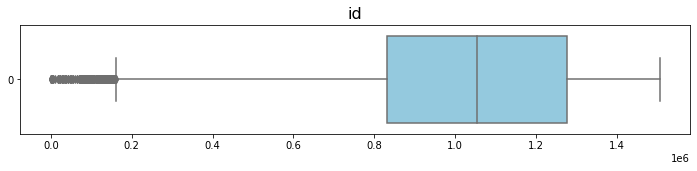

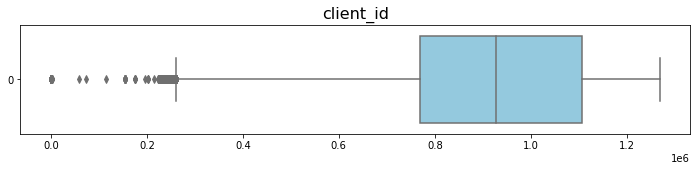

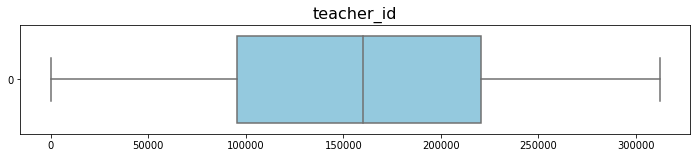

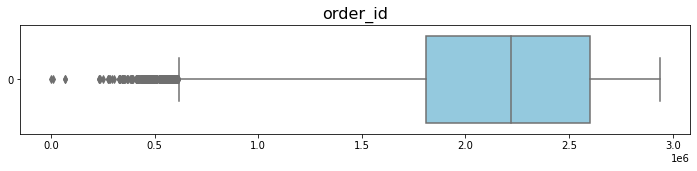

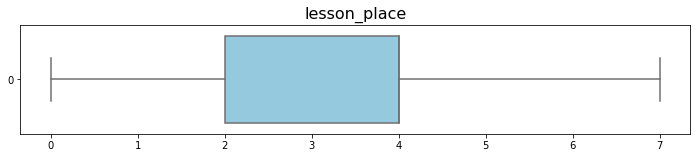

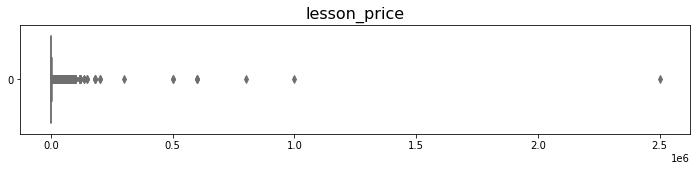

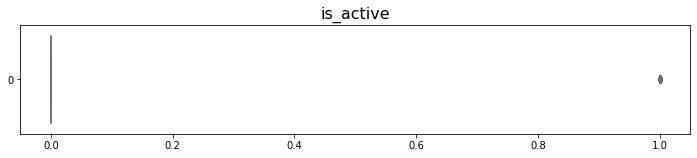

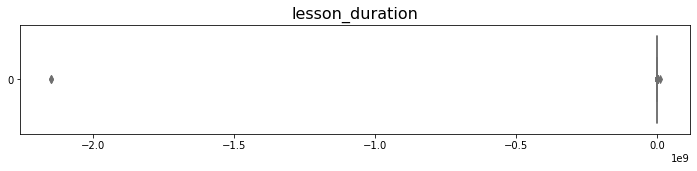

In [28]:
lesson_boxplt = lesson_course.loc[:, ~lesson_course.columns.isin(['date_updated', 'suspend_till_date'])]
boxplot_features(lesson_boxplt)

In [29]:
lesson_course.drop(lesson_course[(lesson_course['lesson_duration'] >= 200) 
                                 | (lesson_course['lesson_duration'] <= 10)].index, inplace=True)

In [30]:
columns_to_check = ['lesson_price']

#  Обработка выбросов
lesson_course = remove_outliers(lesson_course, columns_to_check)

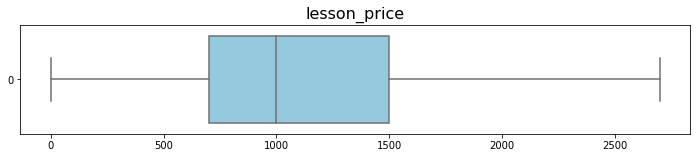

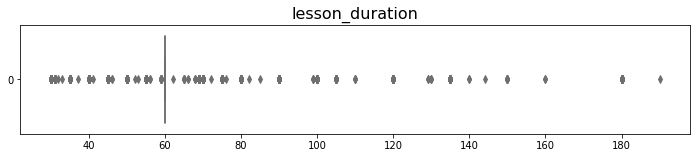

In [31]:
boxplot_features(lesson_course[['lesson_price', 'lesson_duration']])

In [32]:
lesson_course.describe()

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
count,842065.00,842064.00,842065.00,842065.00,842065.00,842065.00,842065.00,842065.00,842065,842065
mean,1055389.73,913492.14,159087.54,2205470.57,3.41,1139.19,0.23,61.46,2022-07-22 23:46:59.050521344,1801-09-04 07:59:34.178708480
min,10.00,1.00,33.00,11.00,0.00,0.00,0.00,30.00,2020-09-01 00:02:01.903000,1800-01-01 00:00:00
25%,833509.00,771509.75,98255.00,1813269.00,2.00,700.00,0.00,60.00,2021-10-14 00:01:54.627000064,1800-01-01 00:00:00
50%,1056519.00,929782.50,162926.00,2224049.00,4.00,1000.00,0.00,60.00,2022-10-01 22:13:07.856999936,1800-01-01 00:00:00
75%,1278260.00,1108555.25,222478.00,2603863.00,4.00,1500.00,0.00,60.00,2023-05-20 10:44:41.736999936,1800-01-01 00:00:00
max,1505419.00,1268616.00,312244.00,2936670.00,7.00,2700.00,1.00,190.00,2023-11-05 23:53:31.187000,2031-08-08 00:00:00
std,258329.29,234197.65,79080.74,449897.61,1.55,534.14,0.42,9.02,NaN,NaN


Среднее значение `lesson_price` - 1139 рублей, в 75% случаев 1500 рублей
Средняя продолжительность урока 61 минута, со стандартным отклонением 9 минут, самый короткий урок длится 30 минут

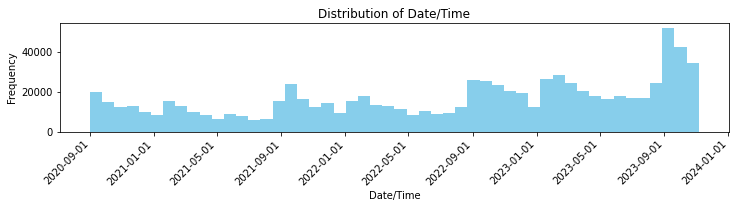

In [33]:
hist_date(lesson_course['date_updated'])

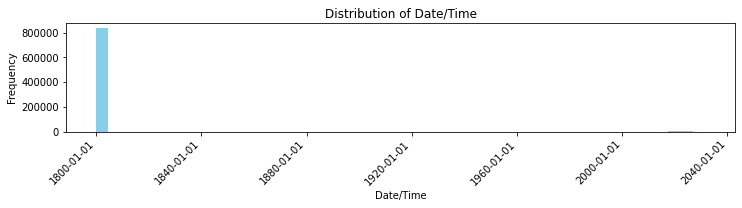

In [34]:
hist_date(lesson_course['suspend_till_date'])

Признак `suspend_till_date` может указывать на момент, до которого какая-то деятельность, процесс или доступ ограничены и/или приостановлены. ❓В данном случае большая часть данных сконцентрирована на 1800гг

- `lesson_price` - значения от 0 до 7, нет выбросов 
- `lesson_price` - отобрали значения по заданному диапазону 
- `lesson_duration` - отобрали от 10 до 200 минут

**Пропуски**

In [35]:
lesson_course[lesson_course.isna().any(axis=1)]

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
678496,882580,NaN,6249,287157.00,1,1200,0,60,2021-12-29 18:50:23.587,1800-01-01


Всего один пропуск 

In [36]:
lesson_course.dropna(inplace=True)

- Преобразовали данные в правильный формат
- Изучили распределение данных
- Обработали выбросы
- Обработали пропуски

## Занятия

In [37]:
# Преобразование данных в нужный формат
lessons['lesson_date'] = lessons['lesson_date'].astype(str)
lessons['time_from'] = lessons['time_from'].astype(str)
lessons['time_to'] = lessons['time_to'].astype(str)

lessons['lesson_date'] = pd.to_datetime(lessons['lesson_date'])
lessons['time_from'] = pd.to_datetime(lessons['time_from'])
lessons['time_to'] = pd.to_datetime(lessons['time_to'])

In [38]:
lessons.head(5)

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid
0,135797,347,2023-04-14,2024-04-05 12:45:00,2024-04-05 13:50:00,NaN,1,NaN,NaN
1,283596,185756,2022-11-15,2024-04-05 20:30:00,2024-04-05 21:30:00,NaN,0,NaN,NaN
2,322184,184189,2022-12-15,2024-04-05 16:00:00,2024-04-05 17:30:00,NaN,0,NaN,NaN
3,371621,213849,2023-02-13,2024-04-05 19:30:00,2024-04-05 20:30:00,NaN,0,NaN,NaN
4,375586,196475,2023-02-16,2024-04-05 10:00:00,2024-04-05 11:00:00,NaN,0,NaN,NaN


In [39]:
lessons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191127 entries, 0 to 1191126
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1191127 non-null  int32         
 1   lesson_course_id  1191127 non-null  int32         
 2   lesson_date       1191127 non-null  datetime64[ns]
 3   time_from         1191127 non-null  datetime64[ns]
 4   time_to           1191127 non-null  datetime64[ns]
 5   home_task         4969 non-null     category      
 6   is_regular        1191127 non-null  int8          
 7   amount_to_pay     593376 non-null   float64       
 8   amount_paid       8143 non-null     float64       
dtypes: category(1), datetime64[ns](3), float64(2), int32(2), int8(1)
memory usage: 58.1 MB


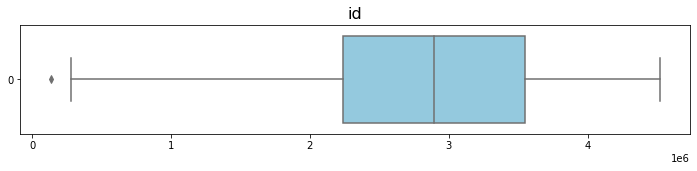

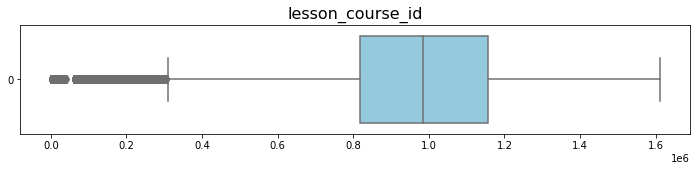

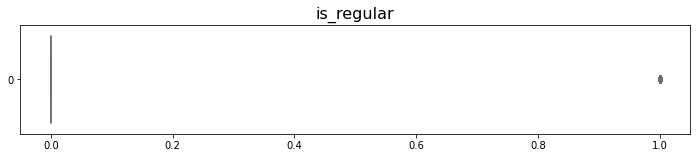

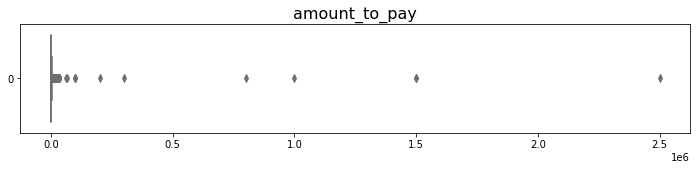

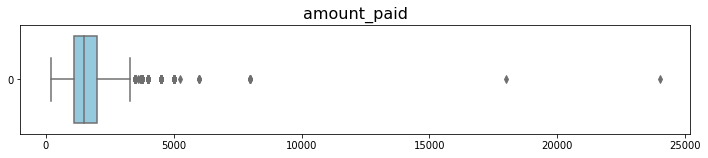

In [40]:
lessons_boxplt = lessons.loc[:, ~lessons.columns.isin(['lesson_date', 'time_from', 'time_to', 'home_task'])]
boxplot_features(lessons_boxplt)

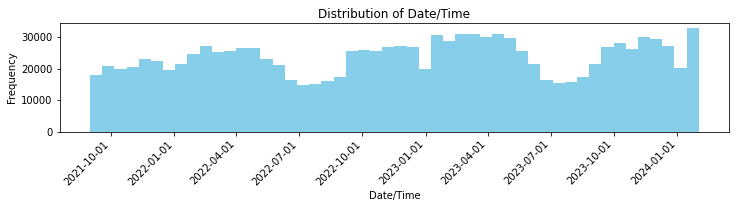

In [41]:
hist_date(lessons['lesson_date'])

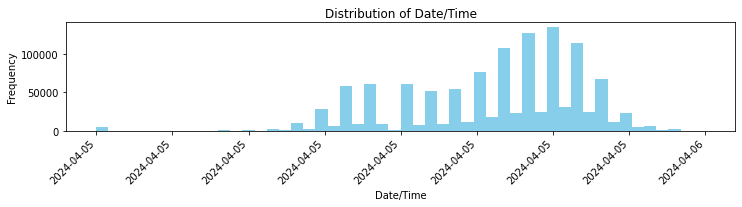

In [42]:
hist_date(lessons['time_from'])

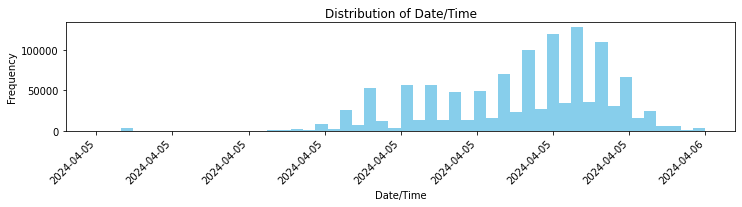

In [43]:
hist_date(lessons['time_to'])

**Пропуски** в данных

In [44]:
lessons[lessons.isna().any(axis=1)].head(5)

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid
0,135797,347,2023-04-14,2024-04-05 12:45:00,2024-04-05 13:50:00,NaN,1,NaN,NaN
1,283596,185756,2022-11-15,2024-04-05 20:30:00,2024-04-05 21:30:00,NaN,0,NaN,NaN
2,322184,184189,2022-12-15,2024-04-05 16:00:00,2024-04-05 17:30:00,NaN,0,NaN,NaN
3,371621,213849,2023-02-13,2024-04-05 19:30:00,2024-04-05 20:30:00,NaN,0,NaN,NaN
4,375586,196475,2023-02-16,2024-04-05 10:00:00,2024-04-05 11:00:00,NaN,0,NaN,NaN


In [45]:
lessons.isna().sum()

id                        0
lesson_course_id          0
lesson_date               0
time_from                 0
time_to                   0
home_task           1186158
is_regular                0
amount_to_pay        597751
amount_paid         1182984
dtype: int64

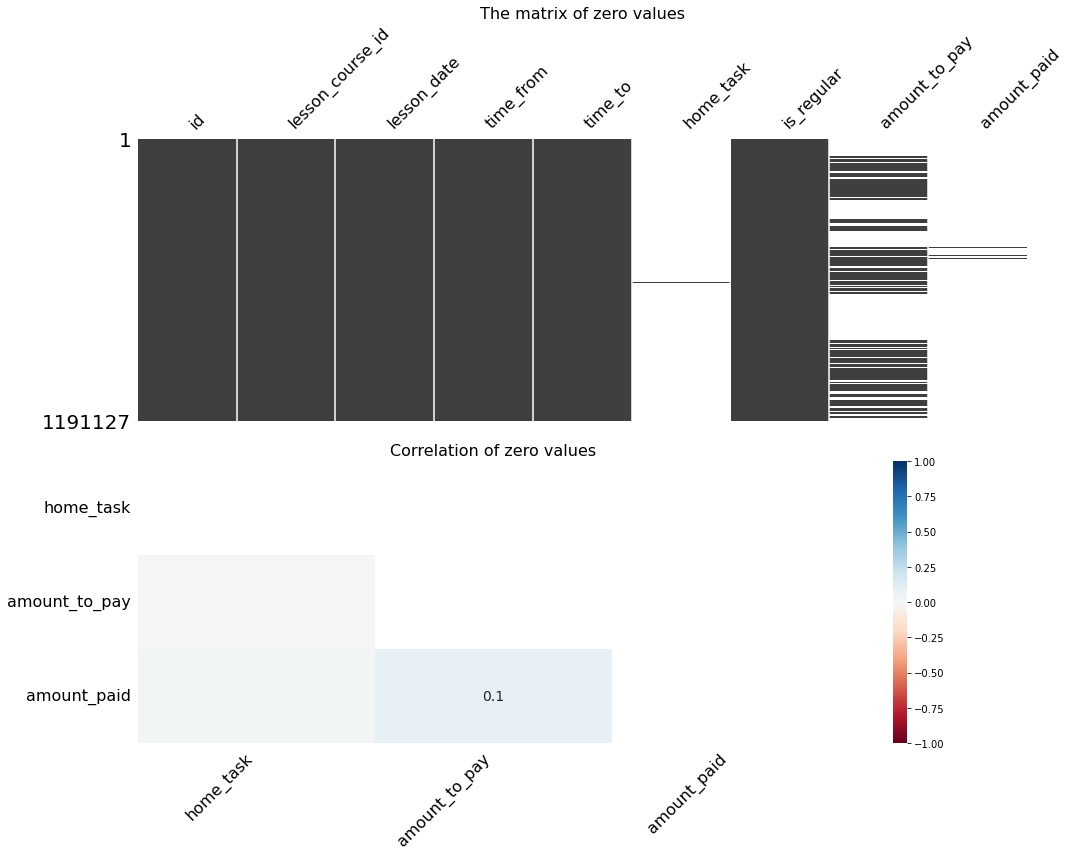

In [46]:
missing_data(lessons)

Информация о домашнем задании `home_task` (1186158) может ли быть такое что заданий просто не было❓
Пропусков в - оплаченных занятий 1182984, он не информативен его можно дропнуть 

In [47]:
lessons.drop(columns=['amount_paid'], inplace=True)

In [48]:
lessons['home_task'].unique()

[NaN, 'HW-08-09-21\n===\n1)"Stranger Things", S1E2-9:\n-watch everything and do the template worksheet for each episode;\n-send the worksheet for each episode after completing for me to check;\n-be ready to start presenting in class;\n-be ready to start the dictations.\n2)"MGL", Module 3, pp.39/50/-54/65/:\n-work through the theory, copying it into your Grammar Notebook;\n-do all of the exercises in writing;\n-do the Review---send to me for correction;\n-do the Test---send to me for correction;\n-be ready to do the Test dictation.\n3)"MGL", Module 4, pp.55/66/-74/85/:\n-work through the theory, copying it into your Grammar Notebook;\n-do all of the exercises in writing;\n-do the Review---send to me for correction;\n-do the Test---send to me for correction;\n-be ready to do the Test dictation.\n4)"HE-Mag-175":\n-listen to the audio non-stop, like radio;\n-read as much as you can;\n-start from the end.', 'HW-06-09-21:\n===\n1)"Reading lessons", pp.7-11, Units 2-3:\n-review regularly.\n2)

In [49]:
lessons['amount_to_pay'].value_counts(dropna=False)

amount_to_pay
NaN        597751
1000.00    100925
1500.00     83140
0.00        48047
500.00      46688
            ...  
2170.00         1
1665.00         1
2917.00         1
3290.00         1
7300.00         1
Name: count, Length: 376, dtype: int64

- Преобразовали данные в правильный формат
- Изучили распределение данных
- Изучили пропуски корреляцию между ними 

## Заявки

In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id      4 non-null        float

In [51]:
orders.head(3)

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.00,None,0,60,None,NaN,None,None,NaN,16,None,NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.00,None,0,60,None,NaN,None,None,NaN,7,"\n01.11.2022 11:46 - ""Заявка прикреплена к заявке № 2294000"" (Алешина Марина)",NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ученика: студентка 1 курса.\nЦель занятий: помощь по программе.,800,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype). Время МСК.\nПредполагаемое число занятий в неделю: 1, будни и суббота после 17, воскресенье в течение дня.",2022-11-01 10:37:02.567,143480.00,16,None,NaN,0,7,None,NaN,14.00,2,0,3,0,0,4,0,0,0,0,0,23,NaN,1024439,10.00,NaN,1200,None,1


In [52]:
orders['payment_date'].value_counts(dropna=False)

payment_date
None                       1062196
2023-03-12 14:20:12.353         37
2021-06-05 11:04:59.003         19
2022-03-29 17:56:33.810         17
2023-05-21 15:02:13.527         15
                            ...   
2022-11-07 10:37:34.370          1
2022-10-29 12:19:18.303          1
2022-11-08 14:15:06.137          1
2022-11-01 16:49:46.807          1
2022-11-19 18:42:39.933          1
Name: count, Length: 124286, dtype: int64

In [53]:
orders['status_id'].value_counts()

status_id
16         792406
7          212816
6          121519
14          32952
8            8178
11           7202
12           4733
15           3469
3            3166
13           2111
4            1852
9            1057
5             291
1             102
2               3
3211265         2
3342337         1
3605505         1
Name: count, dtype: int64

In [54]:
orders.drop(orders[orders['status_id'] > 16].index, inplace=True)

In [55]:
# Преобразование данных
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
orders['start_date'] = pd.to_datetime(orders['start_date'], errors='coerce')
orders['first_lesson_date'] = pd.to_datetime(orders['first_lesson_date'], errors='coerce')
orders['payment_date'] = pd.to_datetime(orders['payment_date'], errors='coerce')

print(orders.dtypes)

id                                  int32
order_date                 datetime64[ns]
subject_id                        float32
purpose                            object
lesson_price                        int32
lesson_duration                     int32
lesson_place                       object
home_metro_id                     float32
add_info                           object
start_date                 datetime64[ns]
working_teacher_id                float32
status_id                           int32
comments                           object
prefered_teacher_id               float32
amount_to_pay                      object
planned_lesson_number               int32
first_lesson_date          datetime64[ns]
creator_id                        float32
pupil_category_new_id             float32
lessons_per_week                    int32
minimal_price                       int32
teacher_sex                         int32
teacher_experience_from             int32
teacher_experience_to             

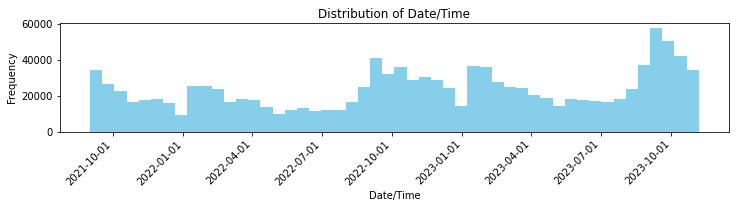

In [56]:
hist_date(orders['order_date'])

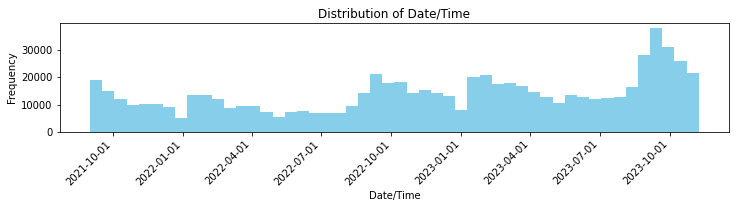

In [57]:
hist_date(orders['start_date'])

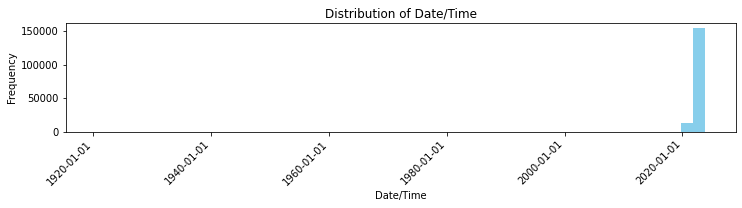

In [58]:
hist_date(orders['first_lesson_date'])

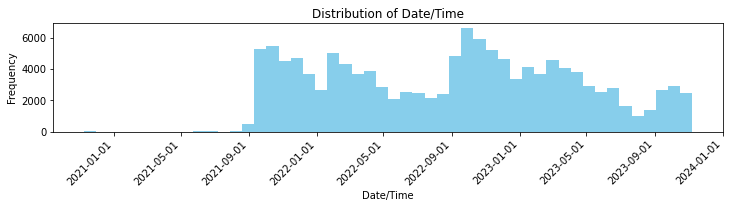

In [59]:
hist_date(orders['payment_date'])

In [60]:
orders.describe()

,id,order_date,subject_id,lesson_price,lesson_duration,home_metro_id,start_date,working_teacher_id,status_id,prefered_teacher_id,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,payment_date,is_display_to_teachers
count,1191847.00,1191847,1181515.00,1191847.00,1191847.00,642440.00,705568,705978.00,1191847.00,0.00,1191847.00,166567,579687.00,1032458.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,1191847.00,582578.00,1191847.00,1042371.00,13514.00,129661,1191847.00
mean,2340485.24,2022-11-13 19:23:43.870257664,10.07,2008.26,60.65,792.22,2022-12-04 17:30:46.311071744,164468.14,13.15,NaN,8.30,2022-10-08 03:11:46.029405696,668204.81,9.92,3.02,201.77,2.08,1.47,0.89,2.86,0.39,8.34,17.42,0.02,0.09,17.55,2325821.75,962510.45,10.75,399.41,2022-08-31 03:14:19.951070720,0.96
min,1742636.00,2021-09-01 00:12:16.713000,1.00,0.00,0.00,1.00,2021-09-01 08:00:03.017000,33.00,1.00,NaN,0.00,1920-08-02 00:00:00,45.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-40.00,-110.00,0.00,0.00,0.00,263.00,1.00,1.00,0.00,2020-11-07 20:29:48.167000,0.00
25%,2041441.50,2022-04-20 17:35:13.456999936,3.00,500.00,60.00,228.00,2022-05-30 11:27:52.074249984,100913.00,7.00,NaN,10.00,2022-03-02 00:00:00,304610.00,8.00,2.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,14.00,2022766.00,868082.50,7.00,30.00,2022-02-12 10:08:50.729999872,1.00
50%,2341553.00,2022-11-25 18:47:02.200000,8.00,1000.00,60.00,644.00,2023-01-10 13:15:13.438500096,169515.50,16.00,NaN,10.00,2022-10-17 00:00:00,780665.00,10.00,3.00,0.00,2.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,16.00,2318886.00,989633.00,10.00,30.00,2022-09-22 13:27:52.987000064,1.00
75%,2638716.50,2023-06-16 13:46:24.535000064,13.00,1500.00,60.00,1146.00,2023-07-15 10:17:33.607499776,234329.00,16.00,NaN,10.00,2023-04-12 00:00:00,971541.50,12.00,4.00,0.00,3.00,1.00,0.00,4.00,0.00,20.00,40.00,0.00,0.00,23.00,2631658.00,1125536.00,13.00,30.00,2023-02-19 19:51:56.856999936,1.00
max,2936685.00,2023-11-05 23:59:45.687000,36.00,1000000000.00,135.00,2704.00,2023-11-07 20:27:46.967000,312304.00,16.00,NaN,10.00,2023-11-07 00:00:00,1333433.00,17.00,7.00,10000000.00,3.00,51.00,500.00,7.00,4.00,4016.00,99999.00,1.00,1.00,26.00,2938030.00,1268632.00,25.00,5000000.00,2023-11-07 20:47:21.583000,1.00
std,344551.78,NaN,7.65,916318.95,7.25,670.19,NaN,81485.70,4.25,NaN,3.56,NaN,401172.78,3.67,1.61,9267.44,1.08,2.78,8.37,1.80,0.85,13.40,100.07,0.15,0.29,4.96,348034.00,217675.06,4.29,43009.87,NaN,0.19


**Пропуски в данных**

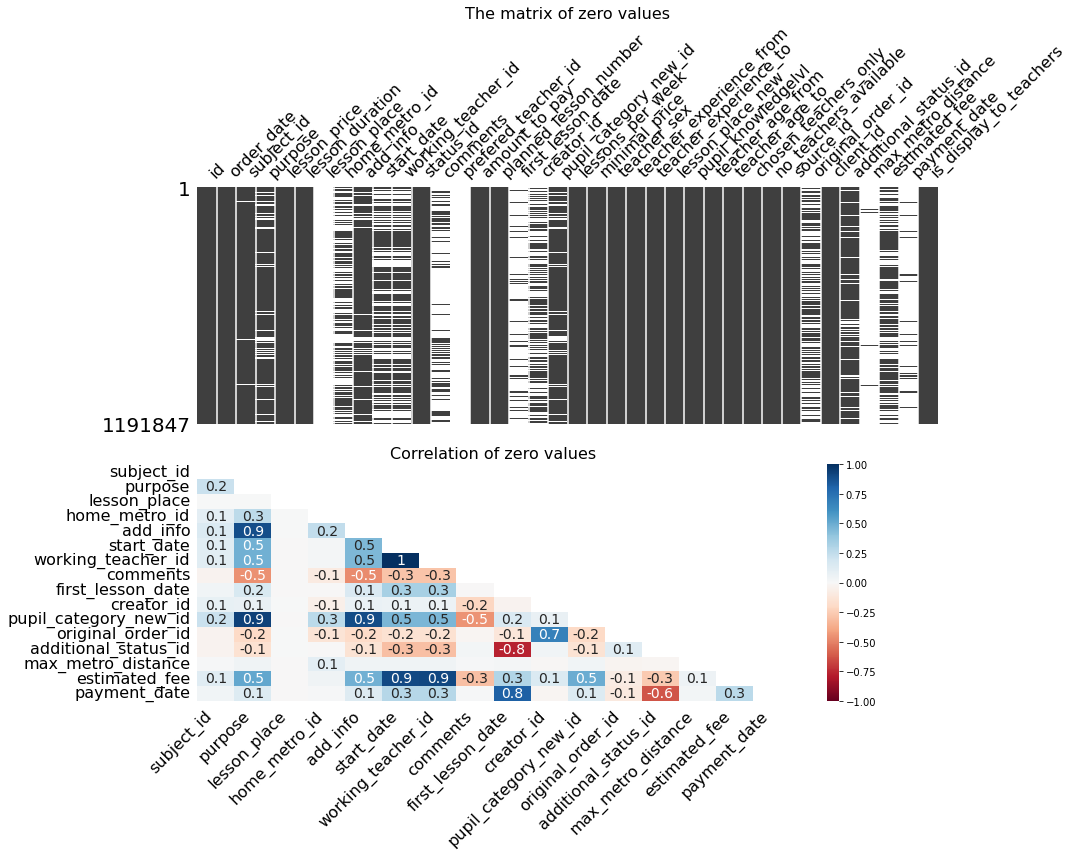

In [61]:
missing_data(orders)

Графики отображают не все данные, чтобы лучше понять взаимосвязи пропущенных значений построим `дендрограмму`. Расстояние между переменными на дендрограмме отображает степень взаимосвязи пропущенных значений между переменными. Более близкие переменные имеют более сильные корреляции в пропусках.

<Axes: >

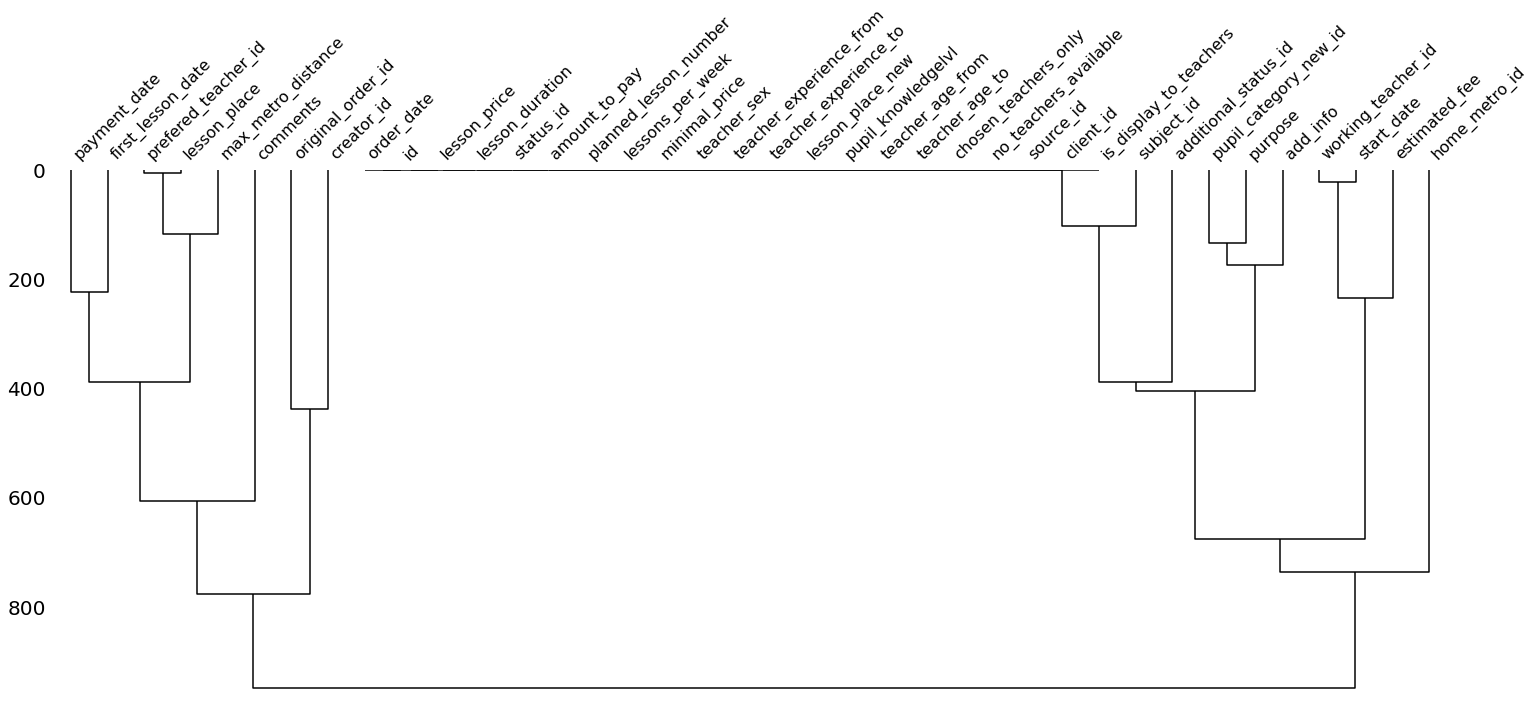

In [62]:
msno.dendrogram(orders)

**Дубли**

In [63]:
orders.duplicated().sum()

899

В данных 900 явных дублей, их нужно удалить

In [64]:
orders[orders.duplicated(keep=False)].head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
104493,2398558,2023-01-07 00:00:12.137,19.00,Разделы: вокал.\nКатегория ученика: парень 27 лет.\nУровень знаний: с нуля.\nЦель занятий:,1200,60,None,1630.00,"Район: г. Кондрово.\nМесто проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю: 1-2. График по согласованию.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: не имеет значения.\nПол репетитора: не имеет значения.\nСтатус репетитора: не имеет значения.",2023-01-07 12:17:22.070,47053.00,14,None,NaN,300,10,NaT,NaN,15.00,3,0,3,0,0,4,1,0,0,0,0,23,NaN,1062677,21.00,NaN,3240,NaT,1
104494,2398559,2023-01-07 00:00:30.097,2.00,"Разделы: американский английский.\nКатегория ученика: женщина.\nУровень знаний: начинающий.\nЦели: преодолеть языковой барьер, повысить уровень до В2.",1500,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю: 1-2.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: от 20 лет до 65 лет.\nПол репетитора: не имеет значения.\nСтатус репетитора: частный преподаватель, носитель языка.",NaT,NaN,16,None,NaN,0,10,NaT,NaN,15.00,3,0,3,0,0,4,2,20,65,0,0,23,NaN,1062678,4.00,NaN,None,NaT,1
104495,2398560,2023-01-07 00:03:20.307,25.00,Разделы: общий курс.\nКатегория ученика: школьник 8 класса.\nУровень знаний: с нуля.\nЦель занятий:,2500,60,None,NaN,"Место проведения занятий: дистанционно (например, Skype).\nПредполагаемое число занятий в неделю: 1, суббота 15:00.\nОпыт репетитора: от 10 лет.\nВозраст репетитора: от 25 лет до 50 лет.\nПол репетитора: женский.\nСтатус репетитора: не имеет значения.",2023-01-07 21:01:38.997,25304.00,6,Тестовая группа : SplitTestB,NaN,7000,10,2023-01-14,NaN,9.00,2,0,2,10,0,4,1,25,50,0,0,16,NaN,1062679,NaN,NaN,7000,2023-01-20 09:42:11.460,1
104496,2398561,2023-01-07 00:04:23.030,19.00,Цели: улучшить успеваемость.\nРазделы: скрипка.\nКатегория ученика: 5 класс.\n,1500,60,None,1.00,"Адрес ученика: г Москва, ул Бойцовая.\nЖелаемое время для занятий: воскресенье - 13, 14, 15, 16, 17, 18, 19, 20; среда - 17, 18, 19, 20; пятница - в любое время; суббота - 18, 19, 20.\nКоличество занятий в неделю: 2.\nОпыт репетитора: не важно.\nВозраст репетитора: от 16 лет до 90 лет.\nПол репетитора: Не важно.\nСтатус репетитора: студент, аспирант, школьный учитель, частный преподаватель, преподаватель вуза.\n",NaT,NaN,7,None,NaN,0,10,NaT,47749.00,6.00,4,0,3,0,0,1,0,16,90,0,0,14,2397609.00,703341,7.00,NaN,4800,NaT,1
104497,2398562,2023-01-07 00:08:31.453,7.00,Разделы: общий курс.\nКатегория ученика: 7 класс.\nУровень знаний: начальный.\nУровень экзамена: A2.\nДо экзамена осталось: Несколько месяцев.\n,1500,60,None,NaN,"Желаемое время для занятий: среда - 19, 20, 21; суббота - 10, 11, 12, 13, 14.\nКоличество занятий в неделю: 1-2.\nОпыт репетитора: от 5 лет.\nВозраст репетитора: от 25 лет до 50 лет.\nПол репетитора: Женский.\nСтатус репетитора: носитель языка.\n",NaT,NaN,16,None,NaN,0,10,NaT,1103573.00,8.00,3,0,2,5,0,4,2,25,50,0,0,23,2398564.00,1062676,7.00,NaN,None,NaT,1


In [65]:
orders.drop_duplicates(inplace=True)

In [66]:
orders.duplicated().sum()

0

- Преобразовали данные в правильный формат
- Изучили распределение данных
- Изучили пропуски корреляцию между ними 
- Изучили дубликиты в данных

## Цены на занятия репетиторов

In [67]:
teacher_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432422 entries, 0 to 432421
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_update     432422 non-null  object 
 1   teacher_id      427852 non-null  float64
 2   subject_id      432422 non-null  int64  
 3   price           432422 non-null  int64  
 4   price_external  432422 non-null  int64  
 5   price_remote    432422 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 19.8+ MB


In [68]:
# Преобразование данных
teacher_prices['date_update'] = pd.to_datetime(teacher_prices['date_update'])
teacher_prices['date_update'].dtype

dtype('<M8[ns]')

In [69]:
# Очистка столбца 'teacher_id' от недопустимых значений перед преобразованием
teacher_prices['teacher_id'] = teacher_prices['teacher_id'].fillna(-1).astype(int)

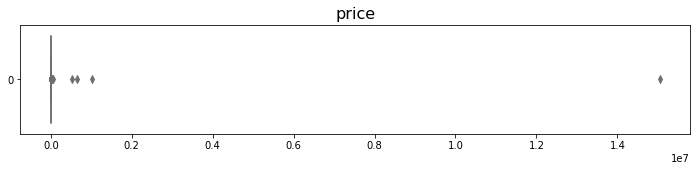

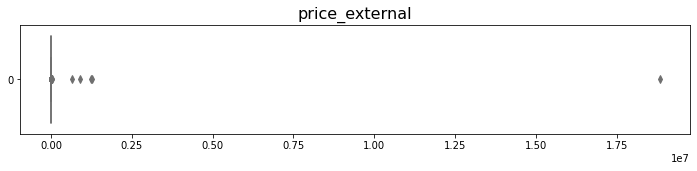

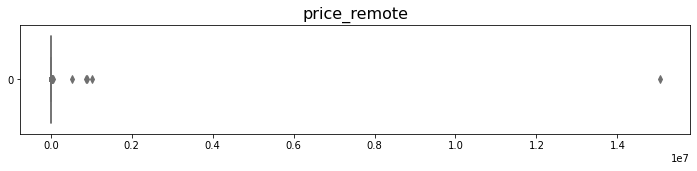

In [70]:
prices_boxplt = teacher_prices.loc[:, ~teacher_prices.columns.isin(['date_update', 'teacher_id', 'subject_id'])]
boxplot_features(prices_boxplt)

Применим функцию для обработки выбросов для столбцов 'price', 'price_external', 'price_remote'

In [71]:
columns_to_check = ['price', 'price_external', 'price_remote']

#  Обработка выбросов
teacher_prices = remove_outliers(teacher_prices, columns_to_check)

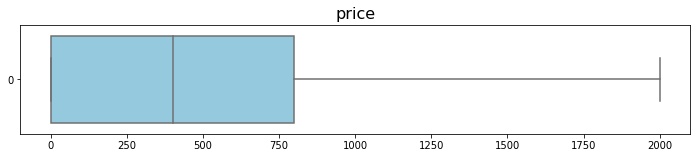

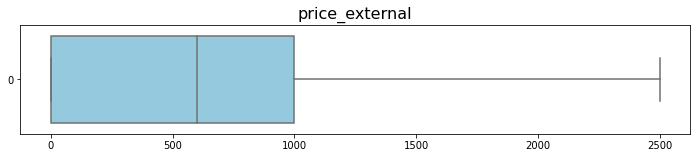

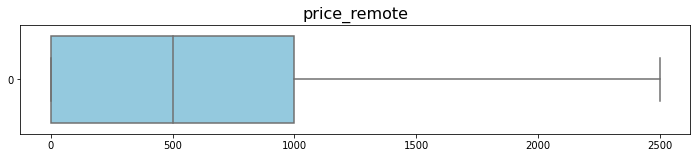

In [72]:
boxplot_features(teacher_prices[['price', 'price_external', 'price_remote']])

In [73]:
teacher_prices.describe()

,date_update,teacher_id,subject_id,price,price_external,price_remote
count,420046,420046.00,420046.00,420046.00,420046.00,420046.00
mean,2017-10-20 00:58:13.926143232,144753.50,9.69,461.84,646.16,580.43
min,2008-01-20 19:47:18.587000,-1.00,1.00,0.00,0.00,0.00
25%,2014-09-18 18:09:16.312999936,66420.00,2.00,0.00,0.00,0.00
50%,2018-06-13 18:45:12.141500160,138165.00,8.00,400.00,600.00,500.00
75%,2021-02-16 13:32:26.528249856,220124.75,14.00,800.00,1000.00,1000.00
max,2024-01-25 13:22:00.390000,317929.00,36.00,2000.00,2500.00,2500.00
std,NaN,90472.43,8.33,529.83,580.86,529.14


- цена занятий у себя: в среднем равно 462 рубля, в 75% случаев 800р
- цена занятий на выезде: в среднем 646 рублей, в 75% случаев 1000р
- цена онлайн занятий: в среднем 580 рублей, в 75% случаев 1000р

Наибольшее стандартное отклонение у занятий на выезде - 580, у себя и онлайн ~530р 

Посмотрим на **пропуски**

In [74]:
teacher_prices.isna().sum()

date_update       0
teacher_id        0
subject_id        0
price             0
price_external    0
price_remote      0
dtype: int64

Пропуски в айди преподавателей 

In [75]:
teacher_prices.duplicated().sum()

835

In [76]:
teacher_prices[teacher_prices.duplicated(keep=False)]

,date_update,teacher_id,subject_id,price,price_external,price_remote
184,2008-03-06 23:44:23.847,393,21,500,500,500
185,2008-03-06 23:44:23.847,393,21,500,500,500
372,2008-04-05 14:00:29.010,733,21,1200,1200,1200
373,2008-04-05 14:00:29.010,733,21,1200,1200,1200
765,2008-06-10 00:23:23.583,1083,27,1000,0,0
...,...,...,...,...,...,...
432050,2024-01-21 18:12:47.910,313764,12,0,0,700
432189,2024-01-23 10:55:13.110,317741,19,0,0,400
432190,2024-01-23 10:55:13.110,317741,19,0,0,400
432264,2024-01-23 20:46:24.810,288780,19,0,0,1000


In [77]:
teacher_prices.drop_duplicates(inplace=True)
teacher_prices.duplicated().sum()

0

- Преобразовали данные в правильный формат
- Изучили распределение данных
- Изучили дубликаты в данных

## Информация о репетиторах

In [78]:
teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       307972 non-null  int64  
 1   reg_date                 307972 non-null  object 
 2   birth_date               307972 non-null  object 
 3   teaching_start_date      307972 non-null  object 
 4   is_email_confirmed       307972 non-null  int64  
 5   lesson_duration          307972 non-null  int64  
 6   lesson_cost              307972 non-null  int64  
 7   is_display               307972 non-null  int64  
 8   last_visited             235837 non-null  object 
 9   is_pupils_needed         11208 non-null   float64
 10  is_cell_phone_confirmed  307972 non-null  int64  
 11  area_id                  307972 non-null  int64  
 12  sex                      307972 non-null  int64  
 13  orders_allowed           307972 non-null  int64  
 14  revi

In [79]:
teachers_info.head()

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
0,33,2007-12-24 19:26:46.000,1983-06-05 00:00:00.000,1989-09-01 00:00:00.000,0,60,1000,1,2022-10-24 16:48:38.410,1.00,0,1,1,0,6
1,46,2007-12-24 19:26:46.000,1980-02-12 00:00:00.000,2003-09-01 00:00:00.000,0,60,500,0,None,1.00,0,1,3,1,0
2,51,2007-12-24 19:26:46.000,1965-04-30 00:00:00.000,1988-09-01 00:00:00.000,0,60,1500,0,2022-09-26 09:43:56.123,1.00,0,1,2,1,0
3,52,2007-12-24 19:26:46.000,1988-07-06 00:00:00.000,2006-09-01 00:00:00.000,0,60,1000,1,2020-04-03 15:53:50.867,0.00,0,1,2,1,2
4,54,2007-12-24 19:26:46.000,1985-09-30 00:00:00.000,2004-01-01 00:00:00.000,0,45,400,0,None,1.00,0,1,3,1,0


Дата регистрации, дата рождения и дата начала первого занятия хранят дату, исправим тип данных

In [80]:
# Преобразование данных
teachers_info['reg_date'] = pd.to_datetime(teachers_info['reg_date'])
teachers_info['birth_date'] = pd.to_datetime(teachers_info['birth_date'])
teachers_info['teaching_start_date'] = pd.to_datetime(teachers_info['teaching_start_date'])
teachers_info['last_visited'] = pd.to_datetime(teachers_info['last_visited'])

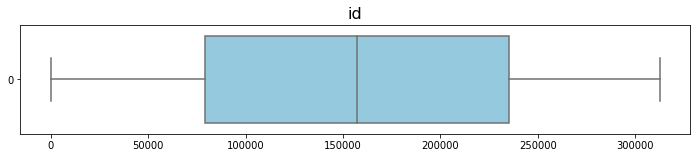

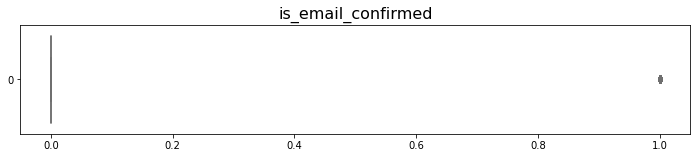

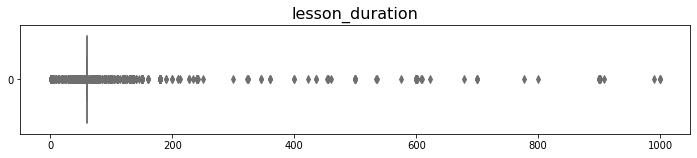

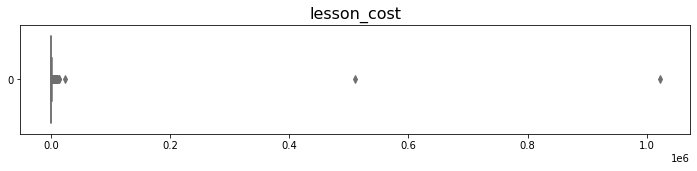

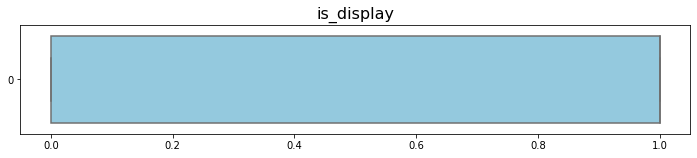

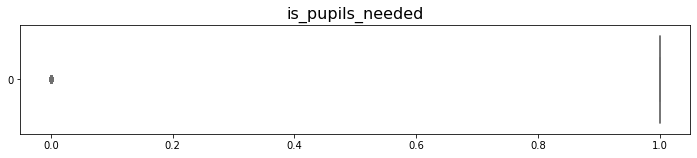

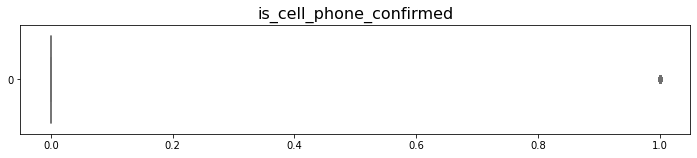

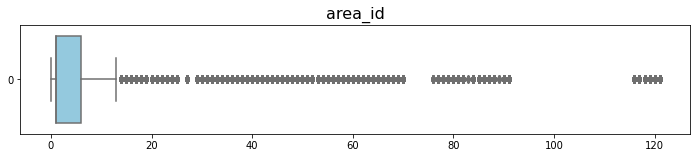

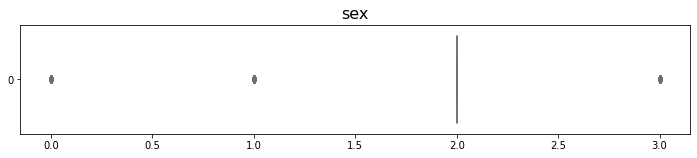

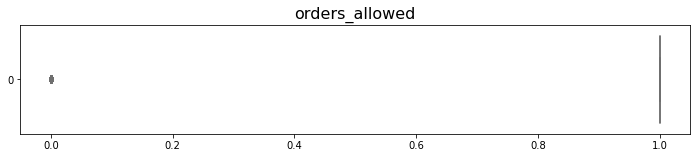

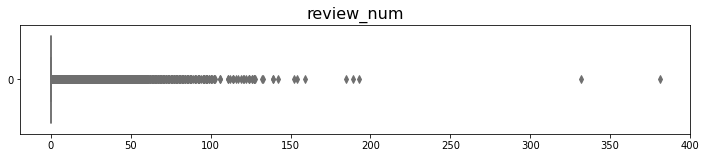

In [81]:
teachers_boxplt = teachers_info.loc[:, ~teachers_info.columns.isin(['reg_date', 'birth_date', 
                                                                    'teaching_start_date', 'last_visited'])]
boxplot_features(teachers_boxplt)

Применим функцию для обработки выбросов

In [82]:
columns_to_check = ['lesson_cost']

#  Обработка выбросов
teachers_info = remove_outliers(teachers_info, columns_to_check)

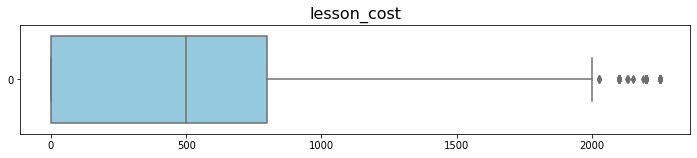

In [83]:
boxplot_features(teachers_info[['lesson_cost']])

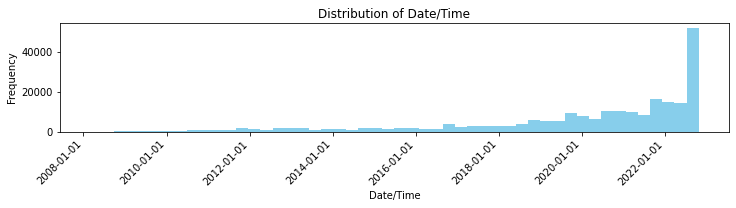

In [84]:
hist_date(teachers_info['last_visited'])

**Дата регистрации**

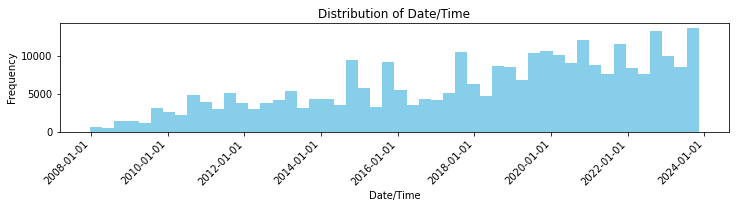

In [85]:
hist_date(teachers_info['reg_date'])

Всё в пределах нормы

**Дата рождения**

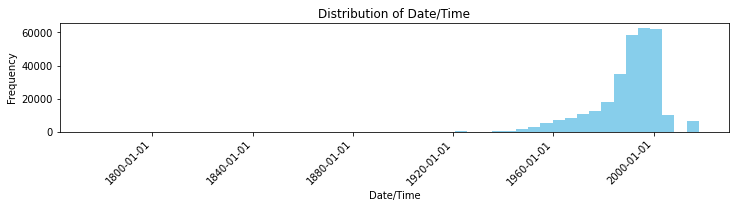

In [86]:
hist_date(teachers_info['birth_date'])

In [87]:
teachers_info['birth_date'].max()

Timestamp('2017-12-22 00:00:00')

In [88]:
teachers_info['birth_date'].min()

Timestamp('1775-02-01 00:00:00')

**Дата начала первого занятия**

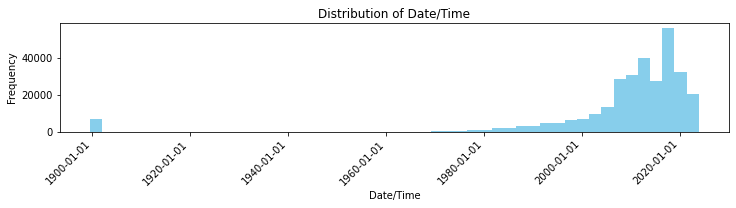

In [89]:
hist_date(teachers_info['teaching_start_date'])

У кого-то старт карьеры был больше века назад...

В `birth_date` есть явные выбросы, будем обрабатывать по мере необходимости

**Пропуски**

In [90]:
teachers_info.isna().sum()

id                              0
reg_date                        0
birth_date                      0
teaching_start_date             0
is_email_confirmed              0
lesson_duration                 0
lesson_cost                     0
is_display                      0
last_visited                71508
is_pupils_needed           293041
is_cell_phone_confirmed         0
area_id                         0
sex                             0
orders_allowed                  0
review_num                      0
dtype: int64

Признаки последний визит и открыт для заявок хранят пропуски

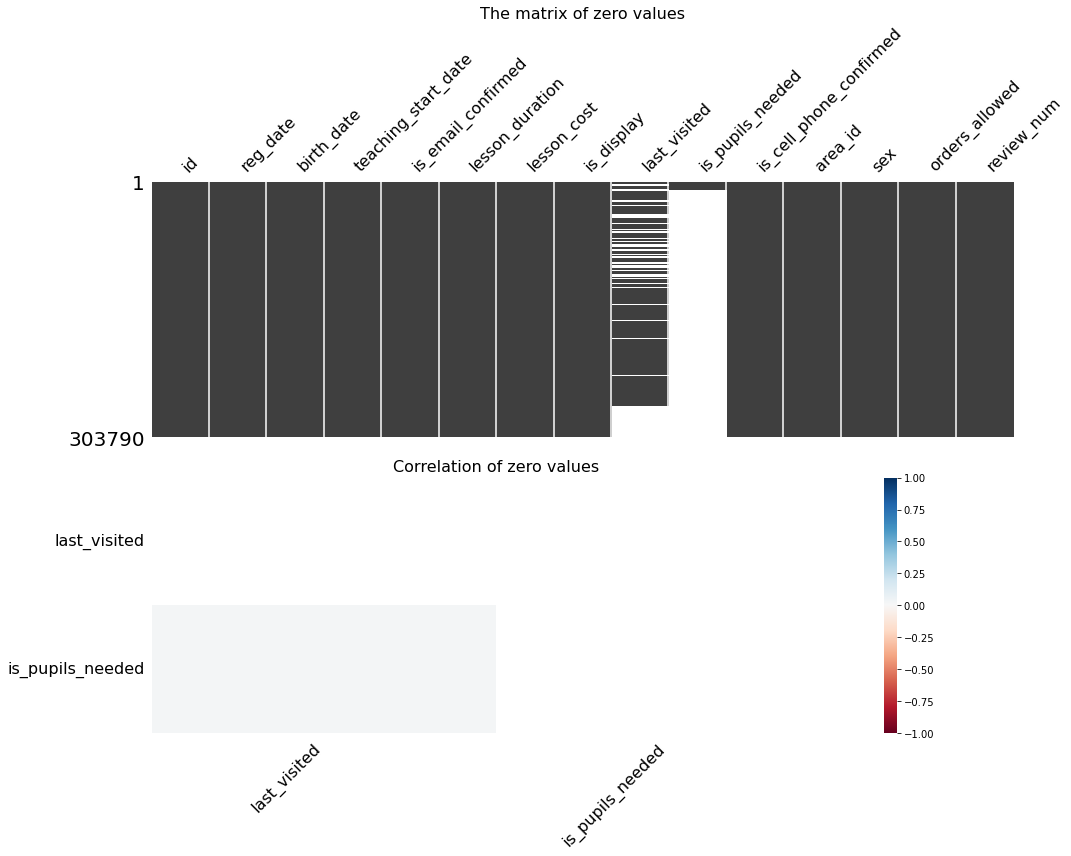

In [91]:
missing_data(teachers_info)

`is_pupils_needed` - открыт для заявок. Больше 90% пропусков 

<Axes: >

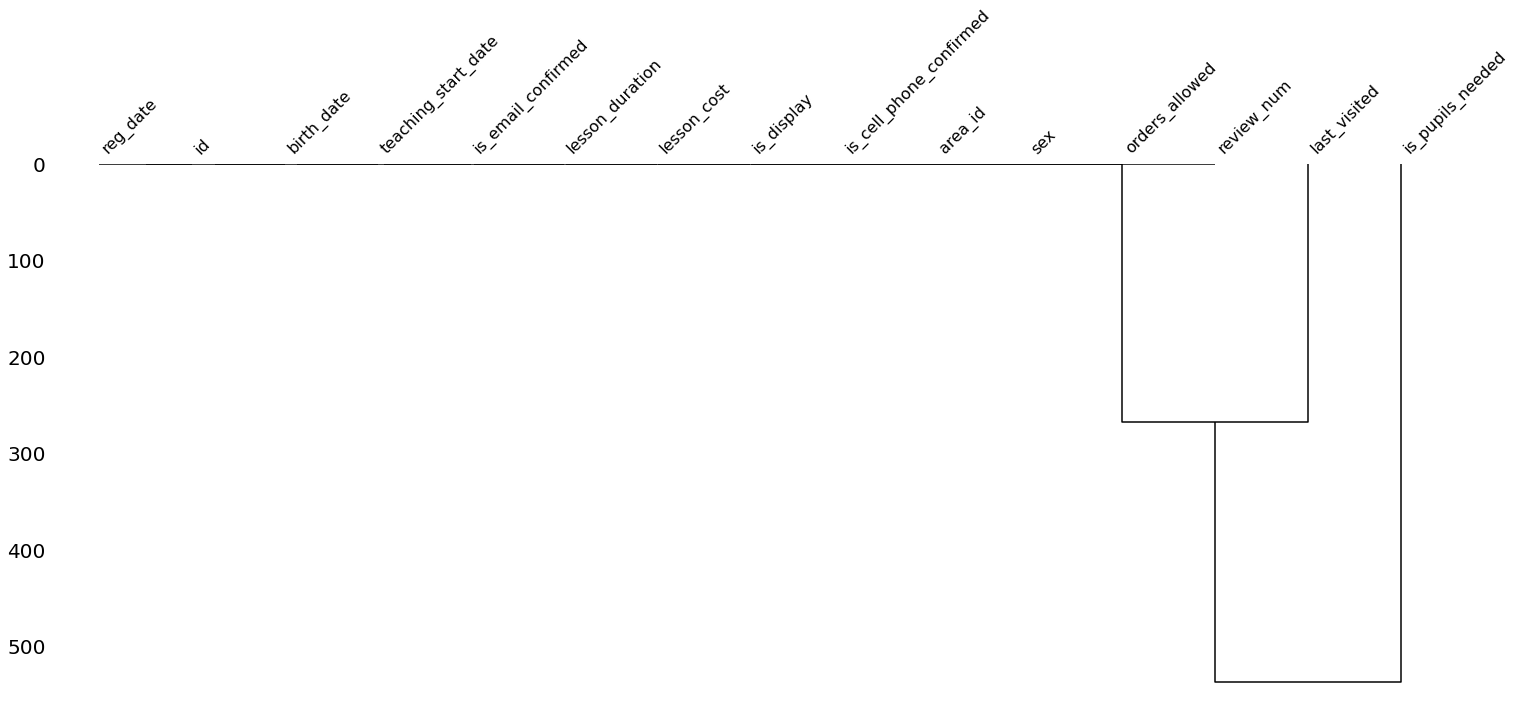

In [92]:
msno.dendrogram(teachers_info)

Взаимосвязи между пропусками нет

## Статистика по репетиторам и таргет

In [93]:
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1656 non-null   int64  
 1   lessons_delivered         1656 non-null   float64
 2   mean_lesson_price         1656 non-null   float64
 3   lessons_given             1656 non-null   float64
 4   lessons_started_fraction  1656 non-null   float64
 5   lessons_per_pupil         1656 non-null   float64
 6   money_recieved            1656 non-null   float64
 7   blocked                   1656 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 103.6 KB


In [94]:
teachers.head()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0
1,153845,1111.00,884.09,1082.00,0.36,77.29,956580.00,0
2,42869,505.00,2500.00,184.00,0.14,61.33,460000.00,0
3,127280,442.00,1879.34,363.00,0.15,60.50,682200.00,0
4,283905,694.00,1252.43,534.00,0.26,59.33,668800.00,0


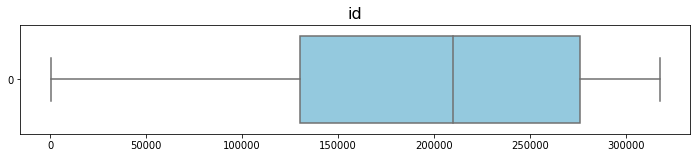

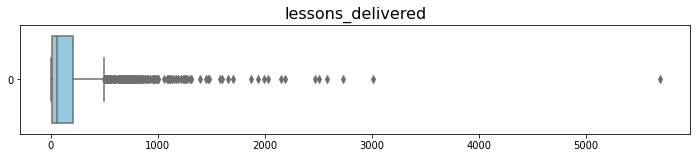

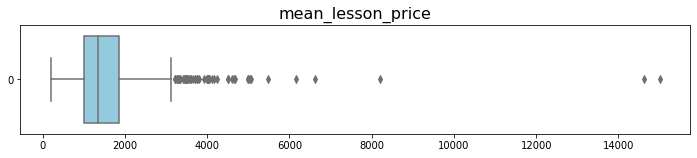

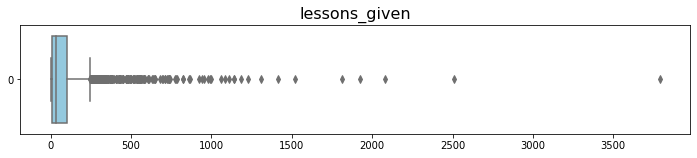

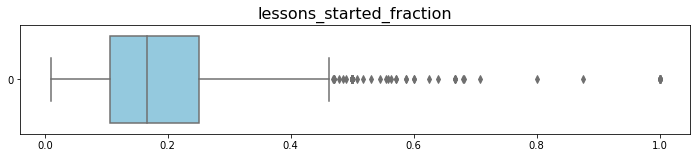

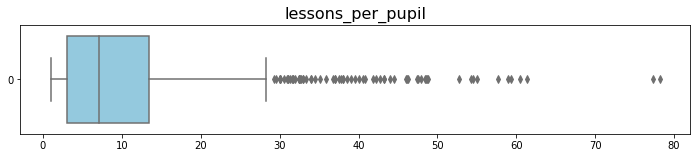

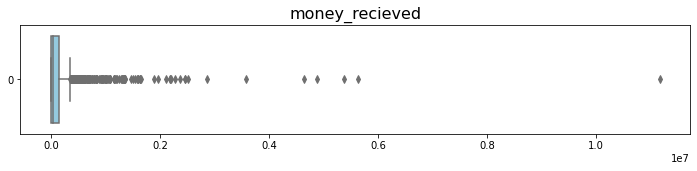

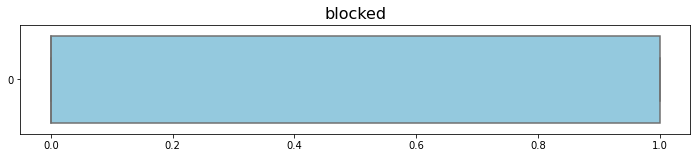

In [95]:
boxplot_features(teachers)

In [96]:
columns_to_check = ['mean_lesson_price']

#  Обработка выбросов
teachers = remove_outliers(teachers, columns_to_check)

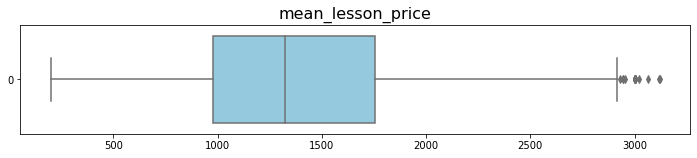

In [97]:
boxplot_features(teachers[['mean_lesson_price']])

In [98]:
teachers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1596 non-null   int64  
 1   lessons_delivered         1596 non-null   float64
 2   mean_lesson_price         1596 non-null   float64
 3   lessons_given             1596 non-null   float64
 4   lessons_started_fraction  1596 non-null   float64
 5   lessons_per_pupil         1596 non-null   float64
 6   money_recieved            1596 non-null   float64
 7   blocked                   1596 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 176.8 KB


## Признаки

In [99]:
# Объединение по двум столбц: 'Id' 'lesson_course_id'
df_lessons = pd.merge(lesson_course, lessons, 
                      left_on='client_id', right_on='lesson_course_id', 
                      how='inner', suffixes=('_course', '_lesson'))

# Объединение данных столбцу 'id' и 'teacher_id'
df_teacher = pd.merge(teachers_info, teacher_prices, 
                      left_on='id', right_on='teacher_id', 
                      how='inner', suffixes=('_info', '_prices'))

In [100]:
df_teach = pd.merge(teachers, teachers_info, 
                      left_on='id', right_on='id', how='left')

In [101]:
df_teach.shape

(1596, 22)

In [102]:
df_teach.duplicated().sum()

0

In [103]:
df_teach.head(5)

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,2020-04-04 10:22:23.207,1997-04-16,2017-09-01,0.00,60.00,800.00,1.00,2022-10-21 16:44:49.877,NaN,0.00,2.00,1.00,1.00,10.00
1,153845,1111.00,884.09,1082.00,0.36,77.29,956580.00,0,2018-10-19 20:23:24.157,1968-03-10,1985-09-01,0.00,60.00,600.00,1.00,2022-10-22 16:16:44.800,NaN,0.00,13.00,2.00,1.00,26.00
2,42869,505.00,2500.00,184.00,0.14,61.33,460000.00,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,127280,442.00,1879.34,363.00,0.15,60.50,682200.00,0,2017-09-06 16:51:20.000,1986-05-07,2005-09-01,0.00,60.00,1500.00,1.00,2022-03-17 22:50:23.267,NaN,0.00,1.00,2.00,1.00,10.00
4,283905,694.00,1252.43,534.00,0.26,59.33,668800.00,0,2023-01-18 13:16:08.137,1973-09-14,1992-09-01,0.00,45.00,1178.00,1.00,NaT,NaN,0.00,116.00,2.00,1.00,1.00


In [104]:
df_teach.reset_index(drop=True, inplace=True)

In [105]:
df_teach.isna().sum()

id                             0
lessons_delivered              0
mean_lesson_price              0
lessons_given                  0
lessons_started_fraction       0
lessons_per_pupil              0
money_recieved                 0
blocked                        0
reg_date                     195
birth_date                   195
teaching_start_date          195
is_email_confirmed           195
lesson_duration              195
lesson_cost                  195
is_display                   195
last_visited                 529
is_pupils_needed            1580
is_cell_phone_confirmed      195
area_id                      195
sex                          195
orders_allowed               195
review_num                   195
dtype: int64

Сразу удалим признак `is_pupils_needed`, так как там больше 0.9 пропусков. Так и не сможем узнать, открыт для заявок преподаватель или нет

In [106]:
df_teach.drop(columns=['is_pupils_needed'], inplace=True)

**Генерим признаки**

Так как нет даты выгрузи данных, для генерации признаков, можно воспользоваться двумя вариантами:
   - Получение текущей даты с datetime.now()
   - Или интуитивно подобрать дату 2024-01-01

*P.S. перебрав оба пункта: на результат выбор порога не влияет*

In [107]:
# Получение текущей даты
current_date = pd.to_datetime('2024-01-01')

Рассчитаем примерный стаж работы и возраст учителя 

In [108]:
# Вычисление стажа в годах

df_teach['experience'] = (
    current_date - df_teach['teaching_start_date']
                         ).dt.days // 365

In [109]:
# Возраст учителя
df_teach['teacher_age'] = (current_date - df_teach['birth_date']).dt.days // 365

Рассчитаем сколько времени прошло с момента последнего визита

In [110]:
# Время с последнего визита
df_teach['visited_min'] = df_teach['last_visited'].dt.minute
df_teach['visited_min'].fillna(value=0, inplace=True)

Добавим признаки года и месяца регистрации

In [111]:
# Получение года и месяца регистрации
df_teach['year_reg'] = df_teach['reg_date'].dt.year
df_teach['month_reg'] = df_teach['reg_date'].dt.month

У нас есть количество проведенных уроков и количество оплаченных, найдем количество неоплаченных занятий на каждого преподавателя. И как вариант, можно расчитать разницу между средней стоимостью одного урока

In [112]:
# Количество неоплаченных уроков
df_teach['diff_less'] = df_teach['lessons_delivered'] - df_teach['lessons_given']

# Разница средней стоимости и стоимости урока
df_teach['diff_price_col'] = abs(df_teach['mean_lesson_price'] - df_teach['lesson_cost'])

In [113]:
df_teach.head()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num,experience,teacher_age,visited_min,year_reg,month_reg,diff_less,diff_price_col
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,2020-04-04 10:22:23.207,1997-04-16,2017-09-01,0.00,60.00,800.00,1.00,2022-10-21 16:44:49.877,0.00,2.00,1.00,1.00,10.00,6.00,26.00,44.00,2020.00,4.00,1.00,484.22
1,153845,1111.00,884.09,1082.00,0.36,77.29,956580.00,0,2018-10-19 20:23:24.157,1968-03-10,1985-09-01,0.00,60.00,600.00,1.00,2022-10-22 16:16:44.800,0.00,13.00,2.00,1.00,26.00,38.00,55.00,16.00,2018.00,10.00,29.00,284.09
2,42869,505.00,2500.00,184.00,0.14,61.33,460000.00,0,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,321.00,NaN
3,127280,442.00,1879.34,363.00,0.15,60.50,682200.00,0,2017-09-06 16:51:20.000,1986-05-07,2005-09-01,0.00,60.00,1500.00,1.00,2022-03-17 22:50:23.267,0.00,1.00,2.00,1.00,10.00,18.00,37.00,50.00,2017.00,9.00,79.00,379.34
4,283905,694.00,1252.43,534.00,0.26,59.33,668800.00,0,2023-01-18 13:16:08.137,1973-09-14,1992-09-01,0.00,45.00,1178.00,1.00,NaT,0.00,116.00,2.00,1.00,1.00,31.00,50.00,0.00,2023.00,1.00,160.00,74.43


**Удалим признаки**

По предоставленной информации `orders_allowed` может привести к утечке, удалим этот признак и те, что хранят дату и время

In [114]:
df_teach.drop(columns=['orders_allowed', 'reg_date', 
                       'birth_date', 'teaching_start_date', 
                       'last_visited'], inplace=True)

In [115]:
df_teach.drop_duplicates(inplace=True)
df_teach.duplicated().sum()

0

In [116]:
df_teach.isna().sum()

id                            0
lessons_delivered             0
mean_lesson_price             0
lessons_given                 0
lessons_started_fraction      0
lessons_per_pupil             0
money_recieved                0
blocked                       0
is_email_confirmed          195
lesson_duration             195
lesson_cost                 195
is_display                  195
is_cell_phone_confirmed     195
area_id                     195
sex                         195
review_num                  195
experience                  195
teacher_age                 195
visited_min                   0
year_reg                    195
month_reg                   195
diff_less                     0
diff_price_col              195
dtype: int64

In [117]:
df_teach.head()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_cell_phone_confirmed,area_id,sex,review_num,experience,teacher_age,visited_min,year_reg,month_reg,diff_less,diff_price_col
0,198013,470.00,1284.22,469.00,0.67,78.17,602300.00,0,0.00,60.00,800.00,1.00,0.00,2.00,1.00,10.00,6.00,26.00,44.00,2020.00,4.00,1.00,484.22
1,153845,1111.00,884.09,1082.00,0.36,77.29,956580.00,0,0.00,60.00,600.00,1.00,0.00,13.00,2.00,26.00,38.00,55.00,16.00,2018.00,10.00,29.00,284.09
2,42869,505.00,2500.00,184.00,0.14,61.33,460000.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,321.00,NaN
3,127280,442.00,1879.34,363.00,0.15,60.50,682200.00,0,0.00,60.00,1500.00,1.00,0.00,1.00,2.00,10.00,18.00,37.00,50.00,2017.00,9.00,79.00,379.34
4,283905,694.00,1252.43,534.00,0.26,59.33,668800.00,0,0.00,45.00,1178.00,1.00,0.00,116.00,2.00,1.00,31.00,50.00,0.00,2023.00,1.00,160.00,74.43


Большая часть признаков хранит данные в целочисленном формате, но задан тип float. Преобразуем данные в нужный формат

In [118]:
col = ['lessons_delivered', 'lessons_given', 'money_recieved',
       'lesson_duration', 'lesson_cost', 'area_id', 'review_num',
       'experience', 'teacher_age', 'visited_min', 'year_reg']

df_teach[col] = df_teach[col].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [119]:
df_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1596 non-null   int64  
 1   lessons_delivered         1596 non-null   Int64  
 2   mean_lesson_price         1596 non-null   float64
 3   lessons_given             1596 non-null   Int64  
 4   lessons_started_fraction  1596 non-null   float64
 5   lessons_per_pupil         1596 non-null   float64
 6   money_recieved            1596 non-null   Int64  
 7   blocked                   1596 non-null   int64  
 8   is_email_confirmed        1401 non-null   float64
 9   lesson_duration           1401 non-null   Int64  
 10  lesson_cost               1401 non-null   Int64  
 11  is_display                1401 non-null   float64
 12  is_cell_phone_confirmed   1401 non-null   float64
 13  area_id                   1401 non-null   Int64  
 14  sex     

Рассчитаем **разную стоимость** за занятие для **разных учеников**:
   - **признак_1:** количество таких случаев, где разная стоимость
   - **признак_2:** если есть такие случаи, присваиваем метку 1, иначе 0  

In [120]:
# Различная стоимость уроков с разными учениками
df_teach['diff_price'] = lesson_course.groupby('teacher_id')['lesson_price'].nunique().reset_index(
    name='diff_price')['diff_price']

df_teach['diff_price_pupils'] = (df_teach['diff_price'] > 1).astype(int)

In [121]:
df_teach.head()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_cell_phone_confirmed,area_id,sex,review_num,experience,teacher_age,visited_min,year_reg,month_reg,diff_less,diff_price_col,diff_price,diff_price_pupils
0,198013,470,1284.22,469,0.67,78.17,602300,0,0.00,60,800,1.00,0.00,2,1.00,10,6,26,44,2020,4.00,1.00,484.22,12,1
1,153845,1111,884.09,1082,0.36,77.29,956580,0,0.00,60,600,1.00,0.00,13,2.00,26,38,55,16,2018,10.00,29.00,284.09,1,0
2,42869,505,2500.00,184,0.14,61.33,460000,0,NaN,<NA>,<NA>,NaN,NaN,<NA>,NaN,<NA>,<NA>,<NA>,0,<NA>,NaN,321.00,NaN,5,1
3,127280,442,1879.34,363,0.15,60.50,682200,0,0.00,60,1500,1.00,0.00,1,2.00,10,18,37,50,2017,9.00,79.00,379.34,6,1
4,283905,694,1252.43,534,0.26,59.33,668800,0,0.00,45,1178,1.00,0.00,116,2.00,1,31,50,0,2023,1.00,160.00,74.43,2,1


In [122]:
df_teach['diff_price_pupils'].value_counts(dropna=False)

diff_price_pupils
1    1133
0     463
Name: count, dtype: int64

In [123]:
df_teach['diff_price'].value_counts(dropna=False)

diff_price
1     463
2     297
3     204
4     153
5     120
6      98
7      69
8      45
9      36
10     31
11     29
12     17
13     10
14     10
15      5
17      4
16      3
19      1
20      1
Name: count, dtype: int64

## ИТОГ

На этапе **предобработки** каждый из наборов данных был тщательно изучен и обработан по мере необходимости.
Итоговый датасет был сгенерирован из основного (teachers) и информации о репетиторах (teachers_info):

**Выбросы в данных** были обработаны заранее сделанной функции для очистки данных, где рассчитывается межквартильный  размах, значения в столбце, выходящие за границы, удаляются из датафрейма

**Пропуски** были изучены с помощью библиотеки `msno`, часть признаков где много пропусков удалены, часть заполнены в ручную, оставшиеся будут обработаны после разделения на X_train, X_test с SimpleImputer с соответствующей стратегией заполнения.

**Сгенерированные признаки:** 
- `experience` приблизительный стаж работы
- `teacher_age` приблизительный возраст учителя
- `visited_min` время с последнего визита в минутах
- `year_reg` и `month_reg` год и месяц регистрации
- `diff_less` количество неоплаченных уроков
- `diff_price_col` разница средней стоимости и стоимости урока
- `diff_price` различная стоимость уроков с разными учениками (количество)
- `diff_price_pupils'` различная стоимость уроков с разными учениками (бинарный)

**Удаленные столбцы** 
- `is_pupils_needed` из-за большого количества пропусков, признак неинформативен
- все признаки с датой и временем 
- ещё не удален, но планируется `is_display`, по словам заказчика, преподаватель показывается в каталоге когда соответствует определенным критериям (критерии не уточняются), состояние активности может сменяться в течение дня

**Итоговые признаки**

- `id` - айди репетитора 
- `lessons_delivered` - поставлено уроков
- `mean_lesson_price` - средняя стоимость уроков
- `lessons_given` - оплачено уроков
- `lessons_started_fraction` - процент начала занятий
- `lessons_per_pupil` - занятий на ученика
- `money_recieved` - получено денег
- `blocked` - целевой признак (active/blocked)
- `lesson_duration` - продолжит урока
- `lesson_cost` - стоимость урока
- `is_display` - показывается в каталоге
- `is_cell_phone_confirmed` - подтвержден ли номер телефона
- `area_id` - регион 
- `sex` - пол 
- `review_num` - отзывы
- `experience` приблизительный стаж работы
- `teacher_age` приблизительный возраст учителя
- `visited_min` время с последнего визита в минутах
- `year_reg` и `month_reg` год и месяц регистрации
- `diff_less` количество неоплаченных уроков
- `diff_price_col` разница средней стоимости и стоимости урока
- `diff_price` различная стоимость уроков с разными учениками (количество)
- `diff_price_pupils'` различная стоимость уроков с разными учениками (бинарный)

# EDA

interval columns not set, guessing: ['id', 'lessons_delivered', 'mean_lesson_price', 'lessons_given', 'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved', 'blocked', 'is_email_confirmed', 'lesson_duration', 'lesson_cost', 'is_display', 'is_cell_phone_confirmed', 'area_id', 'sex', 'review_num', 'experience', 'teacher_age', 'visited_min', 'year_reg', 'month_reg', 'diff_less', 'diff_price_col', 'diff_price', 'diff_price_pupils']


<function matplotlib.pyplot.show(close=None, block=None)>

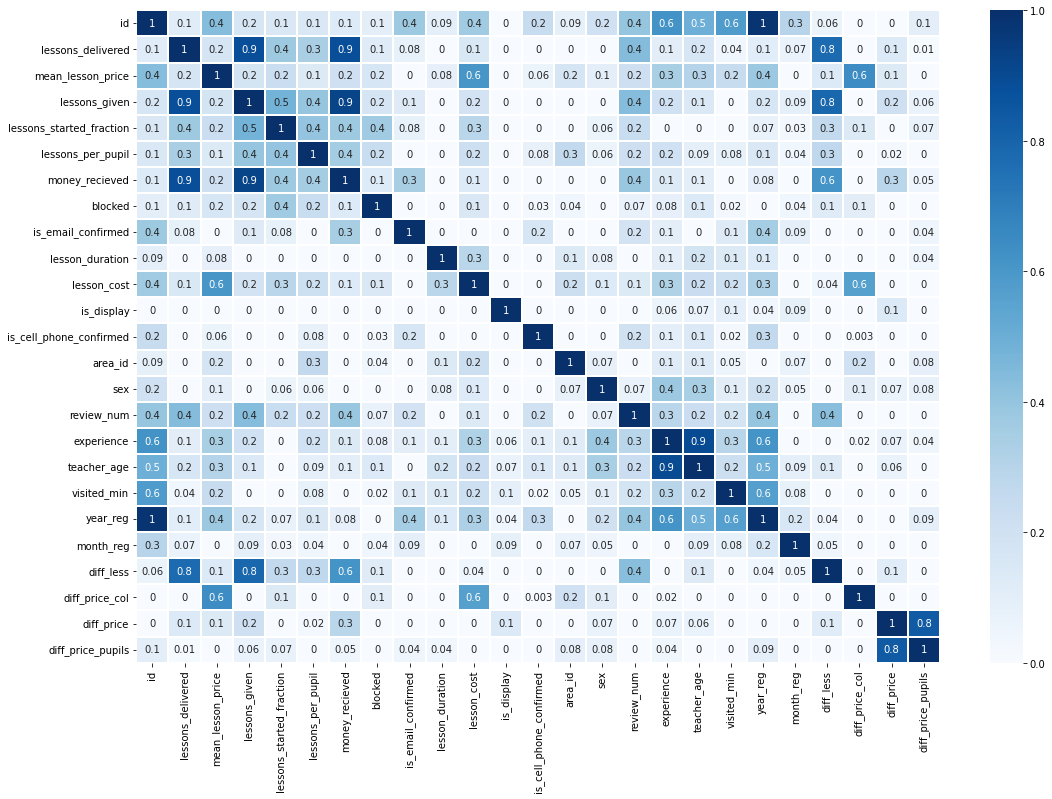

In [124]:
# Матрица корреляции

plt.figure(figsize=(18, 12))
sns.heatmap(df_teach.phik_matrix(), annot=True, 
            fmt='.1g', linewidths=2, cmap='Blues')
plt.show

Сгенерированные фичи
 - `diff_price` различная стоимость уроков с разными учениками (количество)
 - `diff_price_pupils'` различная стоимость уроков с разными учениками (бинарный)
 - `year_reg` год регистрации

оказались не эффективными, корреляция с таргетом нулевая. Подтвержденный номер телефона и e-mail адрес тоже никак не влияют. `is_display` как и ожидалось нулевая взаимосвязь

In [125]:
df_teach.drop(columns=['is_email_confirmed', 'is_display', 
                       'sex', 'lesson_duration', 'year_reg',
                       'diff_price', 'diff_price_pupils',
                       'is_cell_phone_confirmed'], inplace=True)

**Итоговые признаки**

- `id` - айди репетитора 
- `lessons_delivered` - поставлено уроков
- `mean_lesson_price` - средняя стоимость уроков
- `lessons_given` - оплачено уроков
- `lessons_started_fraction` - процент начала занятий
- `lessons_per_pupil` - занятий на ученика
- `money_recieved` - получено денег
- `blocked` - целевой признак (active/blocked)
- `lesson_cost` - стоимость урока
- `area_id` - регион 
- `sex` - пол 
- `review_num` - отзывы
- `experience` приблизительный стаж работы
- `teacher_age` приблизительный возраст учителя
- `visited_min` время с последнего визита в минутах
- `month_reg` месяц регистрации
- `diff_less` количество неоплаченных уроков
- `diff_price_col` разница средней стоимости и стоимости урока

# Обучение моделей

In [126]:
df_teach['blocked'].value_counts(dropna=False)

blocked
0    1056
1     540
Name: count, dtype: int64

In [127]:
X = df_teach.drop('blocked', axis=1)
y = df_teach['blocked']

In [128]:
# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=654321)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1197, 16)
(399, 16)
(1197,)
(399,)


In [129]:
# Создание объекта SimpleImputer с стратегией 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

In [130]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

## Функции

In [131]:
# Важность признаков
def feature_importance(model, X):
    importances = model['classifier'].feature_importances_
    df = pd.DataFrame(
        {'Feature': X.columns, 'Importance': importances}
                     ).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 7))
    sns.barplot(x='Importance', y='Feature', data=df, palette='Blues')
    plt.title('Feature Importance')
    plt.show()

In [132]:
# Матрица ошибок
def error_matrix(model, X, y):

    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    plt.title('Error matrix')
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [133]:
# Препроцессор
preprocessor = ColumnTransformer(
    [
        ('standard_scaler', StandardScaler(), X_train.columns),
    ],
    remainder="passthrough"
)

In [134]:
# Кросс-валидация с повторениями
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=654321)

*Использование метода KFold оказалось не эффективным, из-за чего было принято решение отказаться от его применения*

С учетом дисбаланса воспользуемся **sample_weight** и вручную зададим веса для классов: для положительного класса 2, иначе 1.
Преимущества задания весов:

- **Улучшение прогнозирования** несбалансированных данных
- **Улучшение интерпретируемости** модели 

In [135]:
# Веса классов
sample_weight = np.where(y_train == 1, 2, 1)

## Дерево решений

In [136]:
%%time

pipeline_dtc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

params_dtc = {
    'classifier__max_depth': [4, 6, 8, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_dtc = GridSearchCV(pipeline_dtc, 
                           params_dtc, 
                           cv=5, 
                           scoring='f1', 
                           n_jobs=-1)

grid_dtc.fit(X_train, y_train, classifier__sample_weight=sample_weight)

print(f'Best score: {grid_dtc.best_score_}')
print(f'Best parameters: {grid_dtc.best_params_}')

Best score: 0.5701843818451033
Best parameters: {'classifier__max_depth': 4, 'classifier__min_samples_split': 10}
CPU times: user 344 ms, sys: 35.1 ms, total: 379 ms
Wall time: 2.06 s


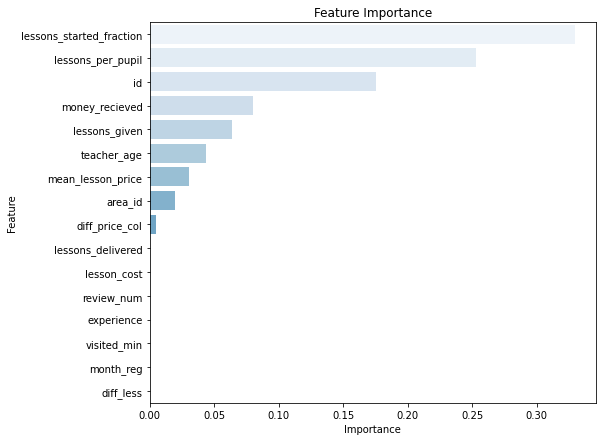

In [137]:
feature_importance(grid_dtc.best_estimator_, X_train)

## Случайный лес

In [138]:
%%time

pipeline_rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

params_rfc = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__ccp_alpha': [0.0, 0.1, 0.01] 
}


grid_rfc = GridSearchCV(pipeline_rfc, 
                           params_rfc, 
                           cv=5, 
                           scoring='f1', 
                           n_jobs=-1)

grid_rfc.fit(X_train, y_train, classifier__sample_weight=sample_weight)

print(f'Best score: {grid_rfc.best_score_}')
print(f'Best parameters: {grid_rfc.best_params_}')

Best score: 0.6141618813819621
Best parameters: {'classifier__ccp_alpha': 0.01, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
CPU times: user 11.2 s, sys: 1.51 s, total: 12.7 s
Wall time: 6min 40s


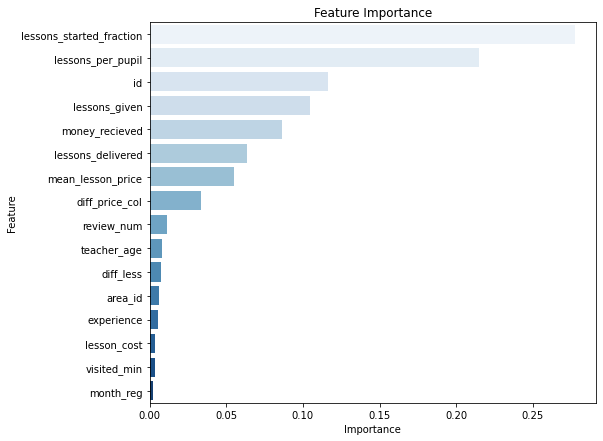

In [139]:
feature_importance(grid_rfc.best_estimator_, X_train)

## Градиентный бустинг

In [140]:
%%time

pipeline_gradient = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(verbose=0))
])

params_gradient = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__ccp_alpha': [0.0, 0.1, 0.01]  
}

grid_gradient = GridSearchCV(pipeline_gradient, 
                           params_gradient, 
                           scoring='f1', 
                           cv=5, 
                           n_jobs=-1,
                           error_score='raise')

grid_gradient.fit(X_train, y_train, classifier__sample_weight=sample_weight)

print(f'Best score: {grid_gradient.best_score_}')
print(f'Best parameters: {grid_gradient.best_params_}')

Best score: 0.6081434001204494
Best parameters: {'classifier__ccp_alpha': 0.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
CPU times: user 7.26 s, sys: 998 ms, total: 8.26 s
Wall time: 5min 14s


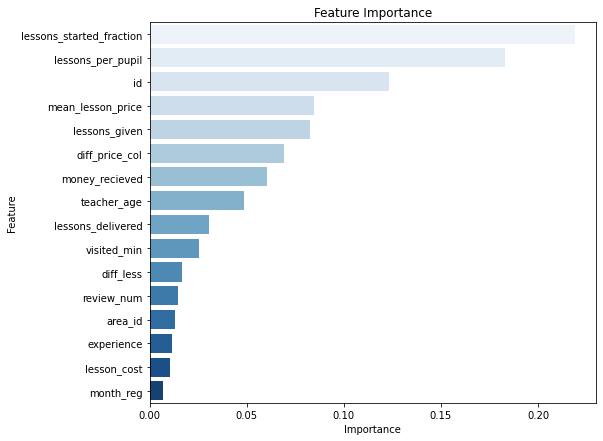

In [141]:
feature_importance(grid_gradient.best_estimator_, X_train)

## Адаптивный бустинг (AdaBoost)

In [142]:
%%time

pipeline_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(), algorithm="SAMME"))
])

params_ada = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__estimator__max_depth': [3, 4, 5],
    'classifier__estimator__min_samples_split': [2, 5, 10],
    'classifier__estimator__ccp_alpha': [0.0, 0.1, 0.01],
}

grid_ada = GridSearchCV(pipeline_ada, 
                           params_ada, 
                           scoring='f1', 
                           cv=5, 
                           n_jobs=-1, 
                           error_score='raise')

grid_ada.fit(X_train, y_train, classifier__sample_weight=sample_weight)

print(f'Best score: {grid_ada.best_score_}')
print(f'Best parameters: {grid_ada.best_params_}')

Best score: 0.618602293883981
Best parameters: {'classifier__estimator__ccp_alpha': 0.0, 'classifier__estimator__max_depth': 3, 'classifier__estimator__min_samples_split': 2, 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}
CPU times: user 7.7 s, sys: 997 ms, total: 8.7 s
Wall time: 4min 50s


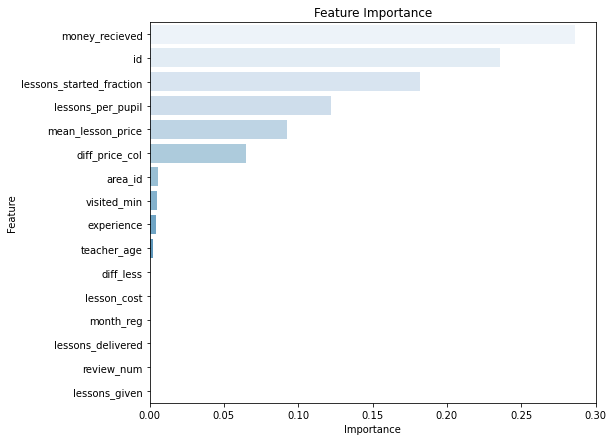

In [143]:
feature_importance(grid_ada.best_estimator_, X_train)

In [144]:
display(pipeline_ada)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  Index(['id', 'lessons_delivered', 'mean_lesson_price', 'lessons_given',
       'lessons_started_fraction', 'lessons_per_pupil', 'money_recieved',
       'lesson_cost', 'area_id', 'review_num', 'experience', 'teacher_age',
       'visited_min', 'month_reg', 'diff_less', 'diff_price_col'],
      dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier()))])

## CatBoost

In [145]:
%%time

pipeline_cat = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(verbose=0))
])

params_cat = {
    'classifier__max_depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__l2_leaf_reg': [1, 3, 5]
}

grid_cat = GridSearchCV(pipeline_cat, 
                           params_cat, 
                           cv=5, 
                           scoring='f1',
                           error_score='raise',
                           n_jobs=-1)

grid_cat.fit(X_train, y_train, classifier__sample_weight=sample_weight)

print(f'Best score: {grid_cat.best_score_}')
print(f'Best parameters: {grid_cat.best_params_}')

Best score: 0.6137989063726212
Best parameters: {'classifier__l2_leaf_reg': 5, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 4}
CPU times: user 9.33 s, sys: 1.77 s, total: 11.1 s
Wall time: 5min 4s


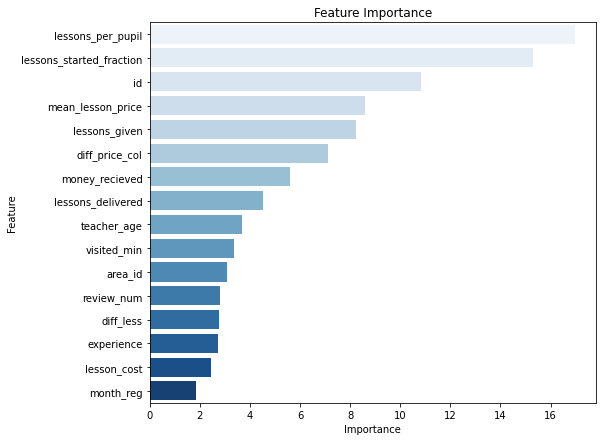

In [146]:
feature_importance(grid_cat.best_estimator_, X_train)

Лучший показатель дает **AdaBoost** со значением метрики **f1** равной **0.62** и в отличие от прочих моделей, отобрал шесть основных признаков для обучения:
```python
- 'money_recieved'
- 'id'
- 'lessons_started_fraction'
- 'lessons_per_pupil'
- 'mean_lesson_price'
- 'diff_price_col'
```

# Test

In [162]:
y_pred = grid_ada.best_estimator_.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       264
           1       0.55      0.74      0.63       135

    accuracy                           0.71       399
   macro avg       0.70      0.72      0.70       399
weighted avg       0.74      0.71      0.72       399



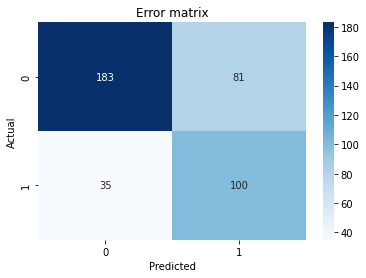

In [164]:
error_matrix(grid_ada, X_test, y_test)

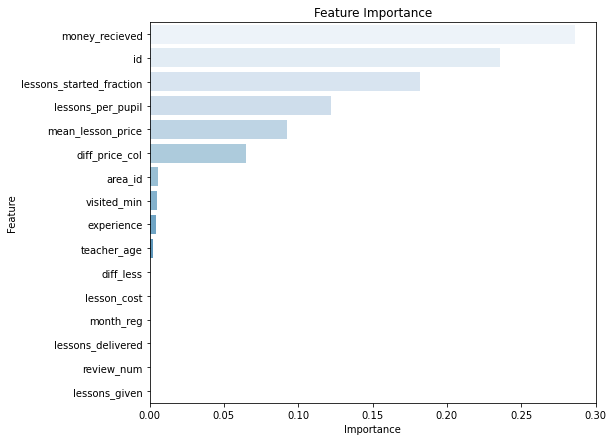

In [165]:
feature_importance(grid_ada.best_estimator_, X_test)

**f1-score** на тестовом наборе данных равен **0.63**

**Error matrix:**
- **класс_0:** правильно угадано 183 объекта из 264
- **класс_1:** правильно угадано 100 объектов из 135 

# Адекватность модели

Поверим модель на **адекватность** с помошью фиктивного классификатора **DummyClassifier**

In [170]:
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X_train, y_train)
dummy_pred = dummy_model.predict(X_test)

f1_dummy = f1_score(y_test, dummy_pred)
f1_ada = f1_score(y_test, y_pred)

print("F1 фиктивной модели: %0.2f" % f1_dummy)
print("F1 итоговой модели: %0.2f" % f1_ada)

F1 фиктивной модели: 0.31
F1 итоговой модели: 0.63


**Итоговая** модель намного **лучше фиктивной**, и может быть использована для прогнозирования

# Отчет

**Заказчик** — площадка по подбору репетиторов `Repetit.ru`.

**Цель:** Разработать модель, которая по имеющейся информации о репетиторе и проведенных им занятий будет классифицировать репетиторов на платящих и избегающих оплаты (обманывающих).

**Метрика:** Оценка качества модели будет производиться с использованием метрики F1.

## Предобработка данных

На основе **teachers**(cтатистика по репетиторам и таргет) и **teachers_info**(информации о репетиторах) был сгенерирован итоговый датасет

**Выбросы в данных** часть данных были обработаны вручную, часть заранее сделанной функции для очистки данных, где рассчитывается межквартильный  размах, где значения в столбце, выходящие за границы, удаляются из датафрейма

**Явные дубликаты** удалены

**Пропуски** были изучены с помощью библиотеки `msno`, часть признаков где много пропусков **удалены**, часть заполнены **в ручную**, оставшиеся **обработаны** после разделения на X_train, X_test с `SimpleImputer` со стратегией `most_frequent`

**Сгенерированные признаки:** 
```python
  - 'experience' приблизительный стаж работы
  - 'teacher_age' приблизительный возраст учителя
  - 'visited_min' время с последнего визита в минутах
  - 'year_reg' и 'month_reg' год и месяц регистрации
  - 'diff_less' количество неоплаченных уроков
  - 'diff_price_col' разница средней стоимости и стоимости урока
  - 'diff_price' различная стоимость уроков с разными учениками (количество)
  - 'diff_price_pupils' различная стоимость уроков с разными учениками (бинарный)  
```

**Удаленные столбцы** 
```python
  - 'is_pupils_needed' из-за большого количества пропусков, признак неинформативен
  - все признаки с датой и временем 
  - 'is_display', по словам заказчика, преподаватель показывается в каталоге когда соответствует определенным критериям (критерии не уточняются), состояние активности может сменяться в течение дня. 
  - Сгенерированные фичи которые оказались не эффективными:  
    - 'diff_price' различная стоимость уроков с разными учениками (количество)     
    - 'diff_price_pupils' различная стоимость уроков с разными учениками (бинарный)
    - 'year_reg' год регистрации
  - 'is_email_confirmed'/'is_cell_phone_confirmed' подтвержденный номер телефона и e-mail адрес - нулевая взаимосвязь
```


**Итоговые признаки**
```python
- 'id' - айди репетитора 
- 'lessons_delivered' - поставлено уроков
- 'mean_lesson_price' - средняя стоимость уроков
- 'lessons_given' - оплачено уроков
- 'lessons_started_fraction' - процент начала занятий
- 'lessons_per_pupil' - занятий на ученика
- 'money_recieved' - получено денег
- 'blocked' - целевой признак (active/blocked)
- 'lesson_cost' - стоимость урока
- 'area_id' - регион 
- 'sex' - пол 
- 'review_num' - отзывы
- 'experience' приблизительный стаж работы
- 'teacher_age' приблизительный возраст учителя
- 'visited_min' время с последнего визита в минутах
- 'month_reg' месяц регистрации
- 'diff_less' количество неоплаченных уроков
- 'diff_price_col' разница средней стоимости и стоимости урока
```

## EDA 
Сгенерированные фичи оказались не эффективными, корреляция с таргетом нулевая `diff_price`, `diff_price_pupils`, `year_reg`.
Подтвержденный номер телефона и e-mail адрес тоже никак не влияют. `is_display` как и ожидалось нулевая взаимосвязь, из-за своей особенности


## Обучение моделей


**Размер тестовой выборки:**

```python
test_size=.25
```
**Параметр random_state:**
```python
random_state=654321
```

**Разделены на стратифицированные подгруппы**
```python
stratify=target 
```
**Обученные модели:**
```python

- DecisionTreeClassifier(Best score: .57)
- RandomForestClassifier(Best score: .61)
- GradientBoostingClassifier(Best score: .60)
- CatBoostClassifier(Best score: .61)
- AdaBoostClassifier(estimator=DecisionTreeClassifier(Best score: .62))

```

## Тестирование модели

**Описание итоговой модели:**
```python
AdaBoostClassifier(estimator=DecisionTreeClassifier())

Best parameters: {
                  'classifier__estimator__ccp_alpha': .01, 
                  'classifier__estimator__max_depth': 3, 
                  'classifier__estimator__min_samples_split': 2, 
                  'classifier__learning_rate': 1, 
                  'classifier__n_estimators': 50
                 }
F1 score(train): .62
F1 score(test): .63
Class_0 = .76
Class_1 = .63
```

## Адекватность модели
```python
F1 фиктивной модели: .31
```